<a href="https://colab.research.google.com/github/akinzayn/HPV-Research/blob/main/HPV_EDA_Note_9_%5BContinuous_Variable%5D_with_Report_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

## **Summary Of Report** 

The analyses were carried out on 24 continuous variables. A t-test was carried out to determine if there is at least a  difference in the means of the negative HPV and positive HPV at a p-value of 0.05. 

Height and Urinary arsenocholine variable were significant for both high and low HPV.  


Age, weight, cotinine, log of urinary monoethylarsonic were significant for only high HPV.  Urinary arsenobetaine, urinary dimethylarsinic acid, total urinary arsenic and total urinary arsenic variables were significant for only low HPV.

Below are the lists of signficant variables and their p-values.


### **Variables Significant For High and Low HPV**

1. Height: high HPV. p-value (~2.2e-16)
           low HPV. P-value (1.96e-08)
2. Urinary arsenocholine: high HPV. P-value (~0.0007)
           low HPV. P-value (~ 0.002)

### **Variables Significant For Only High HPV**

1. Age, p-value (~ 0.003)
2. Weight, p-value (~ 0.0013)
3. Cotinine, p-value (~ 2.2e-18)
4. Log of urinary monoethylarsonic (~ 0.02)

### **Variables Significant For Only Low HPV**

1.  Urinary arsenobetaine, p-value (0.002)
2.  Urinary dimethylarsinic acid, p-value (0.03)
3.  Total urinary arsenic, p-value (0.0003)
4.  Total urinary arsenic 2, p-value (0.005)


In [ ]:
#  https://stackoverflow.com/questions/34818723/export-notebook-to-pdf-without-code



# I was seeking the same question in SO and finally turned out to a very straightforward way:

# Assuming using Firefox(57) + Win7 or Any browser where you have access to console

# Run Jupyter notebook and download the notebook in the browser: File->Download as->HTML and you will get a html page with code and output.
# Open the exported HTML with browser and activate the browser console with key F12
# Run following command in the console:

# document.querySelectorAll("div.input").forEach(function(a){a.remove()})
# The code removes all input div DOM. Then right mouse button and chose "Save Page As" and Save the "Complete page" (not single page).

# You will get a page with an associated folder in windows. Use a trick by zip the html page and then extract to unbind the associated. The folder is useless.

# Now it is a single html page without code. You can re-distribute it or print it as PDF.

# If you are not using Firefox or Windows, please adjust the above 3-6 steps.




# I think now is document.querySelectorAll("div.jp-InputArea.jp-Cell-inputArea").forEach(function(a){a.remove()}) 
# but this for example will keep the errors and markdown with maybe you don't want. 
# To remove all input cells, not only code cells you could use:
#  document.querySelectorAll("jp-Cell jp-CodeCell jp-Notebook-cell").forEach(function(a){a.remove()}) 
#  but is a method to check which columns you want and remove them checking the name of the div.

In [ ]:
# clearing workspace
rm(list = ls())


In [ ]:
# loading packages
# to install magick

install.packages("pacman")
library(pacman)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

p_load('tidyverse', "magrittr", "readxl", "googledrive")


In [ ]:
# loading work space and displaying variables in the workspace

#load("HSV_df.RData")
# ls()
# creating backup and displaying first 6 rows
drive_deauth()
drive_user()
public_file = drive_get(as_id("1y9EBIALTcWzyF64isrSUs4je2W-qbgFjfzF1e6UjYdg"))
downloaded_file = drive_download(public_file, overwrite = TRUE)
HSV_df = read_excel("data_orHPV.all_rev3.xlsx")

HSV_df_back_up = HSV_df
#head(HSV_df)

ℹ Not logged in as any specific Google user.

File downloaded:

• data_orHPV.all_rev3 <id: 1y9EBIALTcWzyF64isrSUs4je2W-qbgFjfzF1e6UjYdg>

Saved locally as:

• data_orHPV.all_rev3.xlsx



In [ ]:
HSV_df <- as.data.frame(sapply(HSV_df, unlist))
HSV_df %<>% 
   mutate(across(where(is.character), ~na_if(., "NA")))
# head(HSV_df,3)



In [ ]:
HSV_df$RIDAGEYRCAT = cut(as.numeric(HSV_df$RIDAGEYR), breaks = c(18, 25, 45, 65, Inf), right = FALSE)


In [ ]:
# Gender
HSV_df$RIAGENDR = factor(HSV_df$RIAGENDR)
levels(HSV_df$RIAGENDR) = c("Male", "Female") 

# High HPV
HSV_df$high.HPV = factor(HSV_df$high.HPV)
levels(HSV_df$high.HPV) = c("Negative", "Positive") 

# Low HPV
HSV_df$low.HPV = factor(HSV_df$low.HPV)
levels(HSV_df$low.HPV) = c("Negative", "Positive") 

# Race
HSV_df$RIDRETH1 = factor(HSV_df$RIDRETH1)
levels(HSV_df$RIDRETH1) = c("Mex-Hisp", "Other-Hisp","Non-Hisp-WT","Non-Hisp-BK", "Others") 

# Education
HSV_df$DMDEDUC2 = factor(HSV_df$DMDEDUC2)
levels(HSV_df$DMDEDUC2) = c("Below 9th Grade", "9-11 Grade","HS or GED","Some College or AA", "Graduate") 

# Marital Status
HSV_df$DMDMARTL = factor(HSV_df$DMDMARTL)
levels(HSV_df$DMDMARTL) = c("Married", "Widowed","Divorced","Separated", "Never married", "Living with partner") 

# Smoking
HSV_df$LBDCOTLC = factor(HSV_df$LBDCOTLC)
levels(HSV_df$LBDCOTLC) = c("Above limit", "Below Limit") 

# Alcohol
HSV_df$ALQ101 = factor(HSV_df$ALQ101)
levels(HSV_df$ALQ101) = c("Yes", "No") 

# Poverty Income Level
HSV_df$PIR = factor(HSV_df$PIR)
# levels(HSV_df$PIR) = c("Yes", "No") 

# Body mass index
HSV_df$BMI.f = factor(HSV_df$BMI.f)
levels(HSV_df$BMI.f) = c("Underweight", "Normal weight" , "Overweight" , "Obesity") 


# Arsenic Level(1)
HSV_df$URDUA3LC.f = factor(HSV_df$URDUA3LC.f)
levels(HSV_df$URDUA3LC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (2)
HSV_df$URDUA5LC.f = factor(HSV_df$URDUA5LC.f)
levels(HSV_df$URDUA5LC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (3)
HSV_df$URDUABLC.f = factor(HSV_df$URDUABLC.f)
levels(HSV_df$URDUABLC.f) = c("Above limit", "Below Limit") 


# Arsenic Level (4)
HSV_df$URDUDALC.f = factor(HSV_df$URDUACLC.f)  
levels(HSV_df$URDUDALC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (5)
HSV_df$URDUDALC.f = factor(HSV_df$URDUDALC.f)
levels(HSV_df$URDUDALC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (6)
HSV_df$URDUMMAL.f = factor(HSV_df$URDUMMAL.f)
levels(HSV_df$URDUMMAL.f) = c("Above limit", "Below Limit") 


HSV_df_backup_postprep = HSV_df

In [ ]:

# freq function

freq = function(var, name = deparse(substitute(var))){
tbl = table( var)
freq_tbl = tbl %>% as.data.frame()
prop_tbl = as.data.frame(prop.table(tbl) * 100) %>% as.data.frame() %>% select(Freq) %>% rename( "% Freq" = Freq)
total = data.frame(var = "Total", Freq = sum(freq_tbl$Freq), "% Freq" = sum(prop_tbl$`% Freq`))
df = cbind(freq_tbl, prop_tbl)
colnames(total) = colnames(df)
df = rbind(df,total)
xname = c(name, colnames(df)[2:length(colnames(df))])
colnames(df) = xname
  return(df)
}

# ctable function

ctable_fn = function( x, y  ){

tbl = table( x, y) %>% as.data.frame.matrix()

prop_tbl = prop.table(tbl) 

tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))

prop_tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))

prop_tbl =  (prop_tbl * 100) %>% round(2)

break_point = dim(tbl)[2]
for(i in 1: dim(tbl)[2]){
  tbl[,i] = paste0(tbl[,i], " [ " , prop_tbl[,i],  "% ]" )
}


return(tbl)

}

In [ ]:

num_summary = function(df){

  ## provide summary of the numerical variables
res = df %>% 
  select_if(is.numeric) %>% 
  gather(variables, value)%>%
  group_by(variables) %>%
  summarise(Count = n(), Mean = mean(value, na.rm=TRUE), Min = quantile(value, 0, na.rm=TRUE), Q1 = quantile(value, 0.25, na.rm=TRUE), 
  Q2 = quantile(value, 0.5, na.rm=TRUE),  Q3 = quantile(value, 0.75, na.rm=TRUE), Max = quantile(value, 1, na.rm=TRUE),
   Sd = sd(value, na.rm=TRUE), .groups = 'drop') 

return(res)
}


# **Analysis of Continuous Variables**

In [ ]:
HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(BMI != "NA") 

to_be_filtered_num = c('RIDAGEYR', 'INDFMPIR' , 'BMXWT' , 'BMXHT' , 
                        'BMXBMI' ,  'BMI' , 'LBXCOT' , 'URXUAS3' , 'URXUAS5' , 'URXUAB' , 'URXUAC' ,
                         'URXUDMA' , 'URXUMMA' , 'ln.URXUAS3' , 'ln.URXUAS5' , 'ln.URXUAB' ,
                          'ln.URXUAC' , 'ln.URXUDMA' , 'ln.URXUMMA', 'TUA', 'TUA1', 'TUA2', 'ln.TUA', 'ln.TUA1', 'ln.TUA2')


HSV_df_num = HSV_df %>% select(all_of(to_be_filtered_num))

HSV_df_num <- lapply(HSV_df_num, function(x) {
    if(is.character(x)) as.numeric(x) else x
}) %>% as.data.frame()

HSV_df_num$BMI = as.numeric(HSV_df_num$BMI )
HSV_df_num$RIDAGEYR = as.numeric(HSV_df_num$RIDAGEYR )

num_summary(HSV_df_num)



variables,Count,Mean,Min,Q1,Q2,Q3,Max,Sd
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BMI,9065,29.2504357,14.1000000,23.9000000,28.0000000,32.9000000,82.900000,7.3593803
BMXBMI,9065,29.2504357,14.1000000,23.9000000,28.0000000,32.9000000,82.900000,7.3593803
BMXHT,9065,167.3200044,135.4000000,160.0000000,167.0000000,174.5000000,202.700000,9.9800442
BMXWT,9065,82.1224931,32.3000000,66.2000000,78.7000000,93.8000000,222.600000,22.6119212
INDFMPIR,9065,2.4494258,0.0000000,1.0300000,2.0600000,3.9200000,5.000000,1.6422039
LBXCOT,9065,58.2135422,0.0110000,0.0110000,0.0400000,18.5000000,1160.000000,126.5973005
ln.TUA,9065,1.9536879,-0.3856625,1.1939225,1.8562980,2.5533438,6.744318,1.0702177
ln.TUA1,9065,1.6310997,0.7561220,1.0715836,1.5789787,2.0528409,4.754021,0.6795469
ln.TUA2,9065,1.2867758,-37.2068042,0.6626880,1.4350845,2.0399208,5.150397,1.4468188


## **Age**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(RIDAGEYR, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$RIDAGEYR = as.numeric(HSV_df_to_use$RIDAGEYR)

t.test(RIDAGEYR ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  RIDAGEYR by high.HPV
t = -3.0367, df = 341.97, p-value = 0.002575
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -4.1386922 -0.8848777
sample estimates:
mean in group Negative mean in group Positive 
              42.40935               44.92114 



For the t-test above, the p-value( ~ 0.003 )is less than alpha level (0.05). Hence there is a significant difference in the mean **age** of the negative (42.41) high HPV and positive (44.92) high HPV.



In [ ]:
high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
summarise(Count = n(), Mean = mean(RIDAGEYR, na.rm=TRUE), Min = quantile(RIDAGEYR, 0, na.rm=TRUE), Q1 = quantile(RIDAGEYR, 0.25, na.rm=TRUE), 
  Q2 = quantile(RIDAGEYR, 0.5, na.rm=TRUE),  Q3 = quantile(RIDAGEYR, 0.75, na.rm=TRUE), Max = quantile(RIDAGEYR, 1, na.rm=TRUE),
   Sd = sd(RIDAGEYR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(RIDAGEYR, na.rm=TRUE), Min = quantile(RIDAGEYR, 0, na.rm=TRUE), Q1 = quantile(RIDAGEYR, 0.25, na.rm=TRUE), 
  Q2 = quantile(RIDAGEYR, 0.5, na.rm=TRUE),  Q3 = quantile(RIDAGEYR, 0.75, na.rm=TRUE), Max = quantile(RIDAGEYR, 1, na.rm=TRUE),
   Sd = sd(RIDAGEYR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")



high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,8748,42.41,18,29,42,56,69,15.22816,0.32
Positive,317,44.92,18,33,45,57,69,14.43855,1.60
Total,9065,42.50,18,29,42,56,69,15.20748,0.31




From the table above those who tested negative for high HPV are roughly 29 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


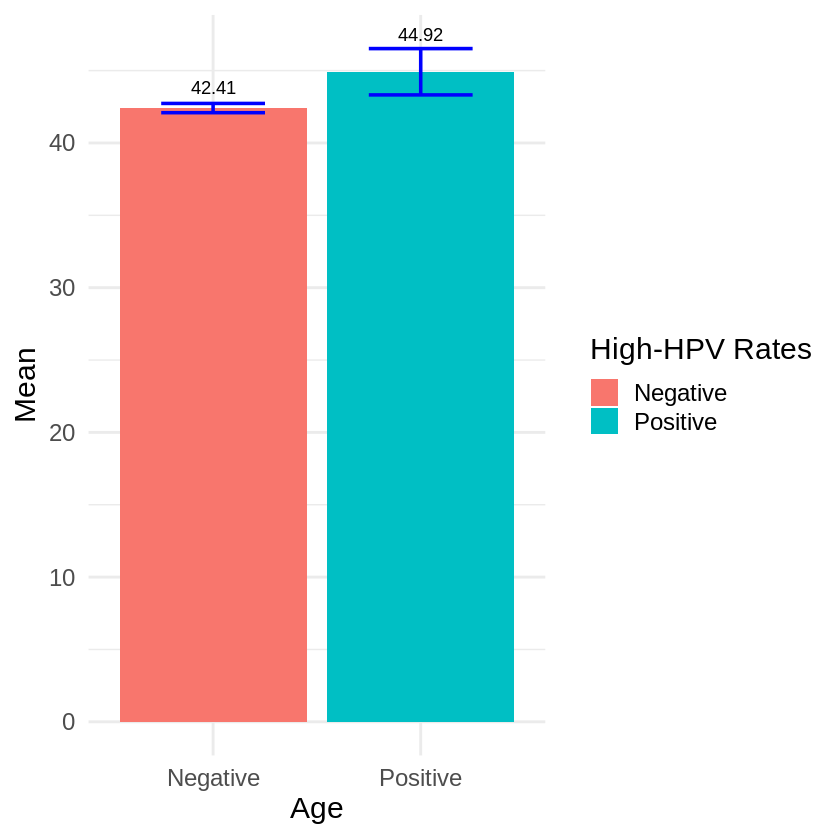

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Age", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(RIDAGEYR, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$RIDAGEYR = as.numeric(HSV_df_to_use$RIDAGEYR)

t.test(RIDAGEYR ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  RIDAGEYR by low.HPV
t = -1.3888, df = 41.358, p-value = 0.1723
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -8.283002  1.531811
sample estimates:
mean in group Negative mean in group Positive 
              42.48155               45.85714 



For the t-test above, the p-value( ~ 0.17 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **age** of the negative (42.48) low HPV and positive (45.85) low HPV.



In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(RIDAGEYR, na.rm=TRUE), Min = quantile(RIDAGEYR, 0, na.rm=TRUE), Q1 = quantile(RIDAGEYR, 0.25, na.rm=TRUE), 
  Q2 = quantile(RIDAGEYR, 0.5, na.rm=TRUE),  Q3 = quantile(RIDAGEYR, 0.75, na.rm=TRUE), Max = quantile(RIDAGEYR, 1, na.rm=TRUE),
   Sd = sd(RIDAGEYR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(RIDAGEYR, na.rm=TRUE), Min = quantile(RIDAGEYR, 0, na.rm=TRUE), Q1 = quantile(RIDAGEYR, 0.25, na.rm=TRUE), 
  Q2 = quantile(RIDAGEYR, 0.5, na.rm=TRUE),  Q3 = quantile(RIDAGEYR, 0.75, na.rm=TRUE), Max = quantile(RIDAGEYR, 1, na.rm=TRUE),
   Sd = sd(RIDAGEYR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,9023,42.48,18,29.00,42.0,56.00,69,15.20423,0.31
Positive,42,45.86,20,31.25,49.5,59.75,68,15.71790,4.90
Total,9065,42.50,18,29.00,42.0,56.00,69,15.20748,0.31




From the table above those who tested negative for high HPV are roughly 200 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


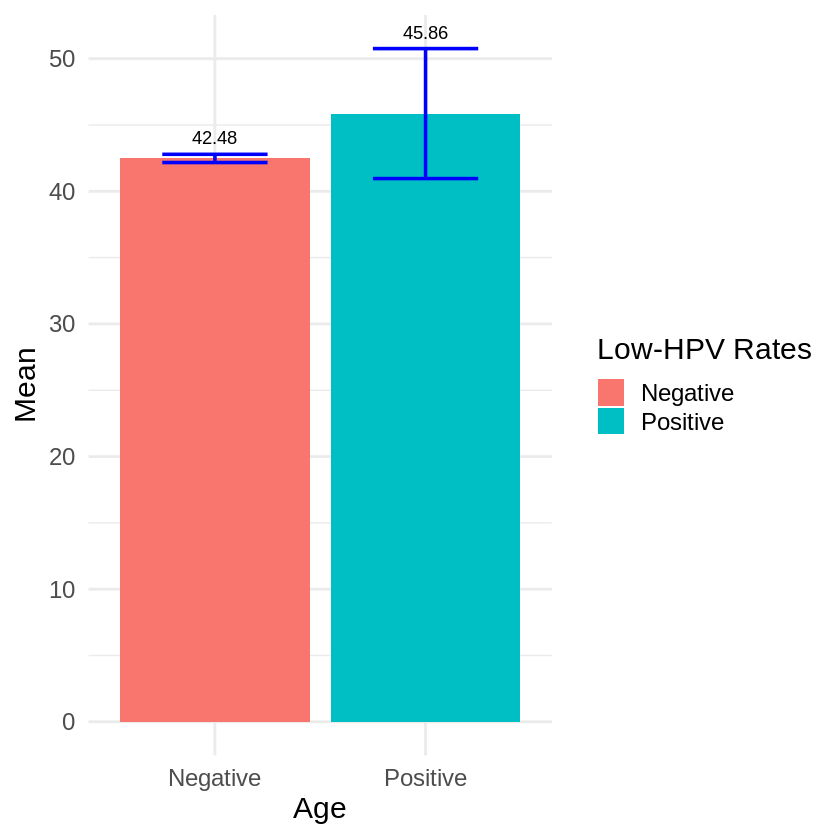

In [ ]:

cat("\n\n\n")



ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean	, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Age", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - .8)) +
      geom_errorbar(aes(ymin = Mean	 - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)




The bar plot above shows the means of the negative and positive values for low HPV. 

## **Body Mass Index**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMI, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMI = as.numeric(HSV_df_to_use$BMI)

t.test(BMI ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMI by high.HPV
t = 1.0415, df = 347.36, p-value = 0.2984
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.3400751  1.1055706
sample estimates:
mean in group Negative mean in group Positive 
              29.26382               28.88107 



For the t-test above, the p-value( ~ 0.30 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **BMI** of the negative (29.26) high HPV and positive (28.88) high HPV.



In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(BMI, na.rm=TRUE), Min = quantile(BMI, 0, na.rm=TRUE), Q1 = quantile(BMI, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMI, 0.5, na.rm=TRUE),  Q3 = quantile(BMI, 0.75, na.rm=TRUE), Max = quantile(BMI, 1, na.rm=TRUE),
   Sd = sd(BMI, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(BMI, na.rm=TRUE), Min = quantile(BMI, 0, na.rm=TRUE), Q1 = quantile(BMI, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMI, 0.5, na.rm=TRUE),  Q3 = quantile(BMI, 0.75, na.rm=TRUE), Max = quantile(BMI, 1, na.rm=TRUE),
   Sd = sd(BMI, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,8748,29.26,14.1,23.9,28.0,32.9,82.9,7.392088,0.15
Positive,317,28.88,16.8,24.1,28.2,33.0,54.0,6.390214,0.71
Total,9065,29.25,14.1,23.9,28.0,32.9,82.9,7.359380,0.15



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


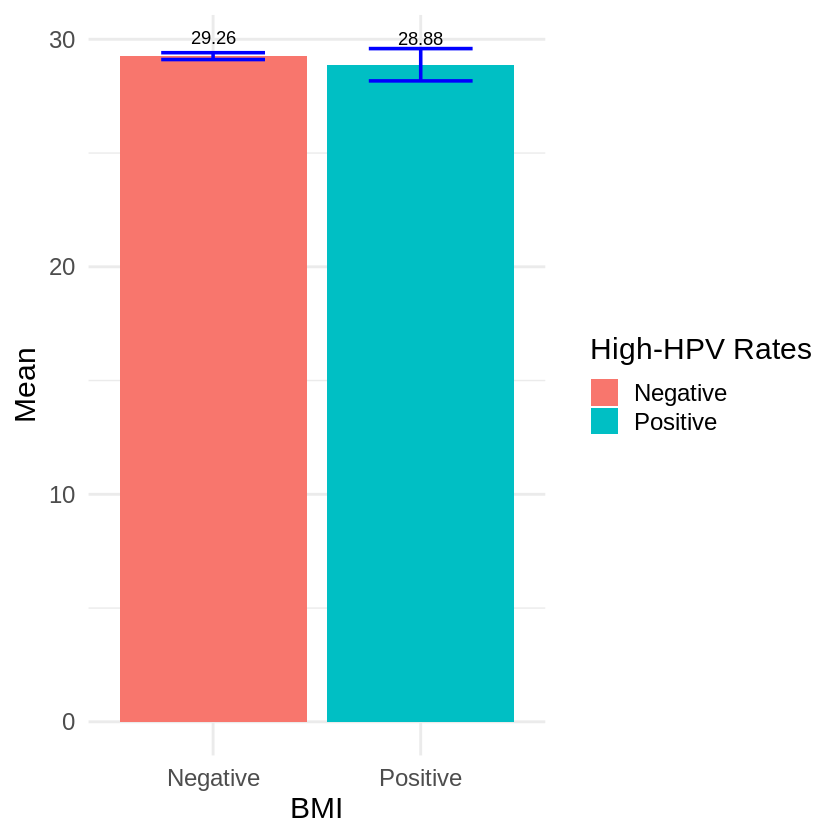

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "BMI", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMI, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMI = as.numeric(HSV_df_to_use$BMI)

t.test(BMI ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMI by low.HPV
t = 1.6791, df = 41.625, p-value = 0.1006
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.3033226  3.3038102
sample estimates:
mean in group Negative mean in group Positive 
              29.25739               27.75714 



For the t-test above, the p-value( ~ 0.10 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **BMI** of the negative (29.26) low HPV and positive (28.88) low HPV.



In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(BMI, na.rm=TRUE), Min = quantile(BMI, 0, na.rm=TRUE), Q1 = quantile(BMI, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMI, 0.5, na.rm=TRUE),  Q3 = quantile(BMI, 0.75, na.rm=TRUE), Max = quantile(BMI, 1, na.rm=TRUE),
   Sd = sd(BMI, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(BMI, na.rm=TRUE), Min = quantile(BMI, 0, na.rm=TRUE), Q1 = quantile(BMI, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMI, 0.5, na.rm=TRUE),  Q3 = quantile(BMI, 0.75, na.rm=TRUE), Max = quantile(BMI, 1, na.rm=TRUE),
   Sd = sd(BMI, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,9023,29.26,14.1,23.950,28.00,33.00,82.9,7.365525,0.15
Positive,42,27.76,16.8,23.525,27.15,30.85,46.6,5.768465,1.80
Total,9065,29.25,14.1,23.900,28.00,32.90,82.9,7.359380,0.15



From the table above those who tested negative for high HPV are roughly 200 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


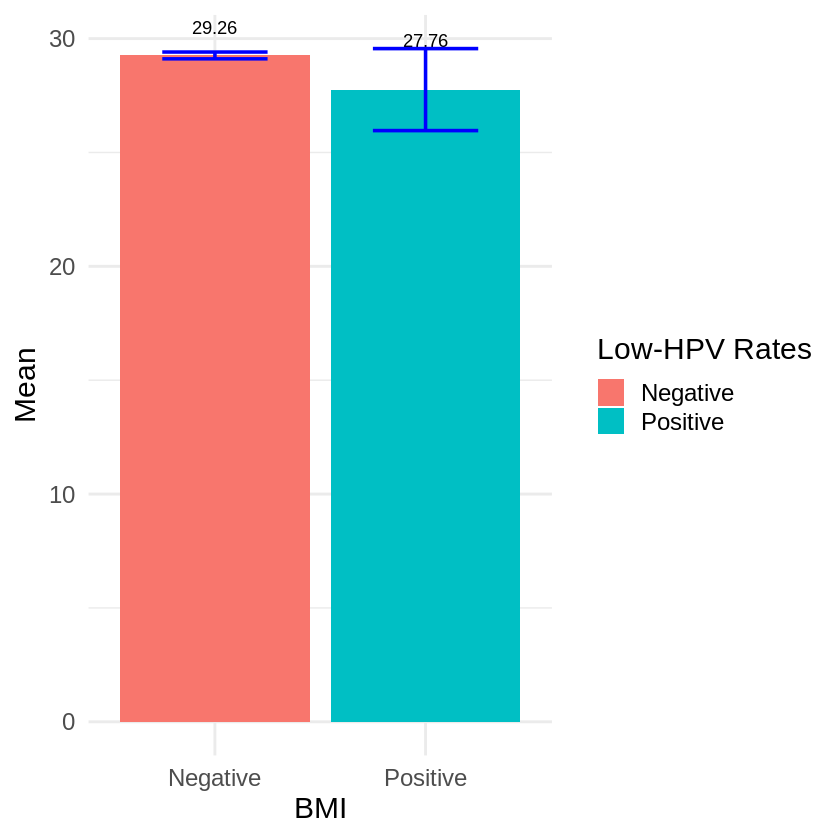

In [ ]:


ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "BMI", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)





The bar plot above shows the means of the negative and positive values for low HPV. 

## **Family Poverty Income Ratio**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(INDFMPIR, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$INDFMPIR = as.numeric(HSV_df_to_use$INDFMPIR)

t.test(INDFMPIR ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  INDFMPIR by high.HPV
t = 1.4678, df = 316.71, p-value = 0.1432
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.04798142  0.32986007
sample estimates:
mean in group Negative mean in group Positive 
              2.454431               2.313492 



For the t-test above, the p-value( ~ 0.14 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **PIR** of the negative (2.50) high HPV and positive (2.31) high HPV.



In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(INDFMPIR, na.rm=TRUE), Min = quantile(INDFMPIR, 0, na.rm=TRUE), Q1 = quantile(INDFMPIR, 0.25, na.rm=TRUE), 
  Q2 = quantile(INDFMPIR, 0.5, na.rm=TRUE),  Q3 = quantile(INDFMPIR, 0.75, na.rm=TRUE), Max = quantile(INDFMPIR, 1, na.rm=TRUE),
   Sd = sd(INDFMPIR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(INDFMPIR, na.rm=TRUE), Min = quantile(INDFMPIR, 0, na.rm=TRUE), Q1 = quantile(INDFMPIR, 0.25, na.rm=TRUE), 
  Q2 = quantile(INDFMPIR, 0.5, na.rm=TRUE),  Q3 = quantile(INDFMPIR, 0.75, na.rm=TRUE), Max = quantile(INDFMPIR, 1, na.rm=TRUE),
   Sd = sd(INDFMPIR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,8012,2.45,0,1.03,2.06,3.930,5,1.642944,0.04
Positive,295,2.31,0,1.01,1.73,3.635,5,1.618813,0.19
Total,8307,2.45,0,1.03,2.06,3.920,5,1.642204,0.04



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


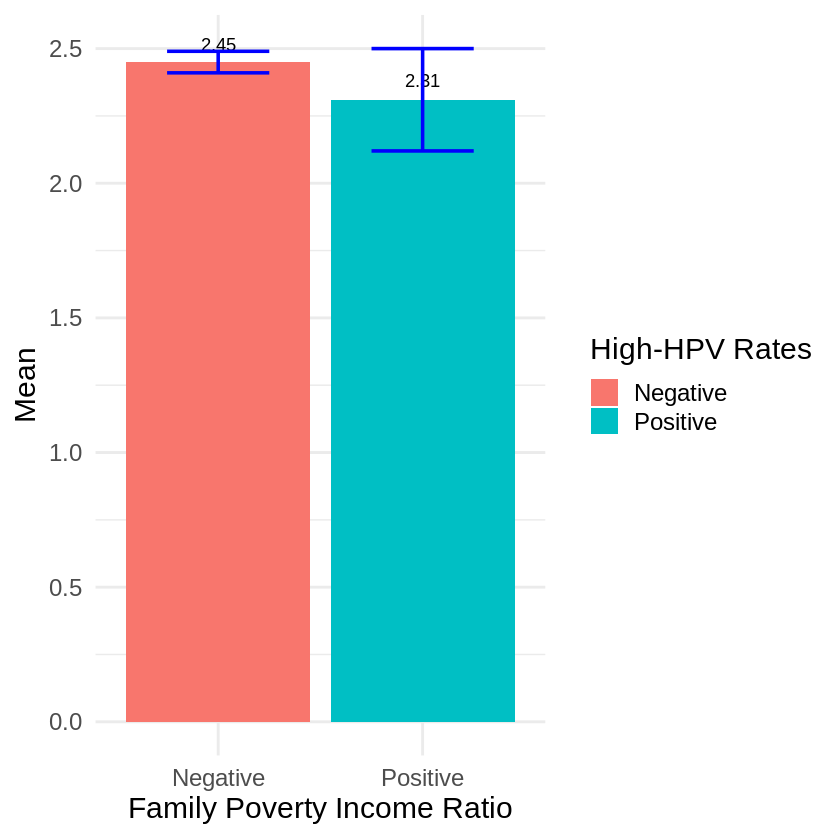

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Family Poverty Income Ratio", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(INDFMPIR, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$INDFMPIR = as.numeric(HSV_df_to_use$INDFMPIR)

t.test(INDFMPIR ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  INDFMPIR by low.HPV
t = -0.59224, df = 38.443, p-value = 0.5572
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.6215549  0.3401108
sample estimates:
mean in group Negative mean in group Positive 
              2.448765               2.589487 



For the t-test above, the p-value( ~ 0.56 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **PIR** of the negative (2.45) low HPV and positive (2.58) low HPV.



In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(INDFMPIR, na.rm=TRUE), Min = quantile(INDFMPIR, 0, na.rm=TRUE), Q1 = quantile(INDFMPIR, 0.25, na.rm=TRUE), 
  Q2 = quantile(INDFMPIR, 0.5, na.rm=TRUE),  Q3 = quantile(INDFMPIR, 0.75, na.rm=TRUE), Max = quantile(INDFMPIR, 1, na.rm=TRUE),
   Sd = sd(INDFMPIR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(INDFMPIR, na.rm=TRUE), Min = quantile(INDFMPIR, 0, na.rm=TRUE), Q1 = quantile(INDFMPIR, 0.25, na.rm=TRUE), 
  Q2 = quantile(INDFMPIR, 0.5, na.rm=TRUE),  Q3 = quantile(INDFMPIR, 0.75, na.rm=TRUE), Max = quantile(INDFMPIR, 1, na.rm=TRUE),
   Sd = sd(INDFMPIR, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,8268,2.45,0.00,1.030,2.06,3.930,5,1.642985,0.04
Positive,39,2.59,0.51,1.185,2.56,3.445,5,1.479573,0.48
Total,8307,2.45,0.00,1.030,2.06,3.920,5,1.642204,0.04



From the table above those who tested negative for high HPV are roughly 200 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


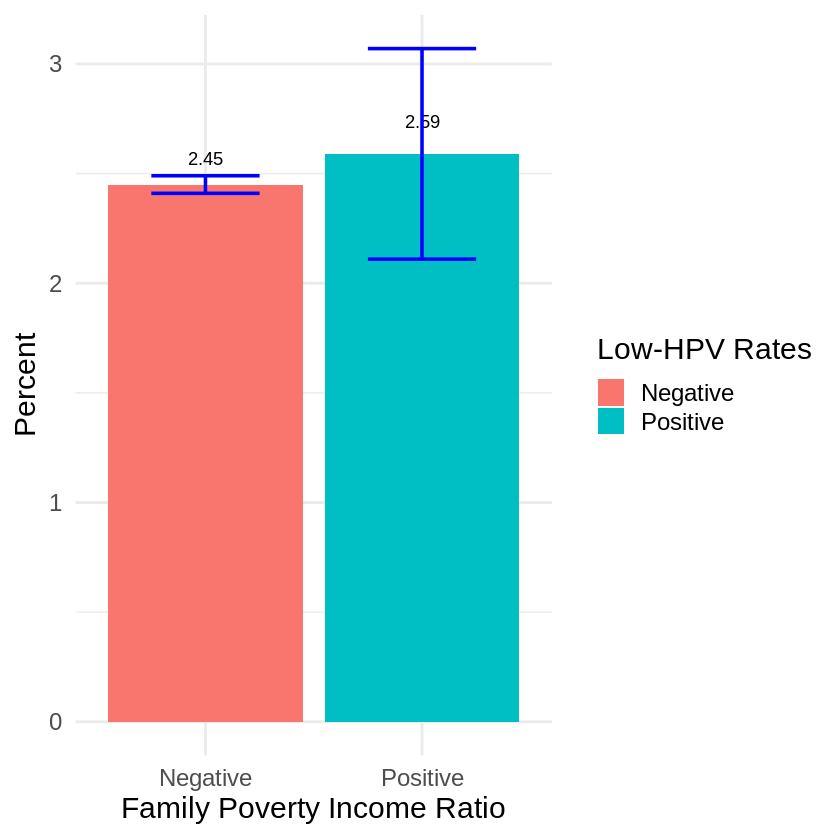

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Family Poverty Income Ratio", y = "Percent", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Weight**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMXWT, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMXWT = as.numeric(HSV_df_to_use$BMXWT)

t.test(BMXWT ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMXWT by high.HPV
t = -3.24, df = 339.85, p-value = 0.001313
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -6.65745 -1.62767
sample estimates:
mean in group Negative mean in group Positive 
              81.97763               86.12019 



For the t-test above, the p-value( ~ 0.001 )is less than alpha level (0.05). Hence there is a significant difference in the mean **weight** of the negative (2.50) high HPV and positive (2.31) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(BMXWT, na.rm=TRUE), Min = quantile(BMXWT, 0, na.rm=TRUE), Q1 = quantile(BMXWT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXWT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXWT, 0.75, na.rm=TRUE), Max = quantile(BMXWT, 1, na.rm=TRUE),
   Sd = sd(BMXWT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(BMXWT, na.rm=TRUE), Min = quantile(BMXWT, 0, na.rm=TRUE), Q1 = quantile(BMXWT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXWT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXWT, 0.75, na.rm=TRUE), Max = quantile(BMXWT, 1, na.rm=TRUE),
   Sd = sd(BMXWT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,8748,81.98,32.3,66.0,78.6,93.6,222.6,22.60922,0.47
Positive,317,86.12,41.0,71.2,82.5,99.1,178.4,22.35357,2.47
Total,9065,82.12,32.3,66.2,78.7,93.8,222.6,22.61192,0.47



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


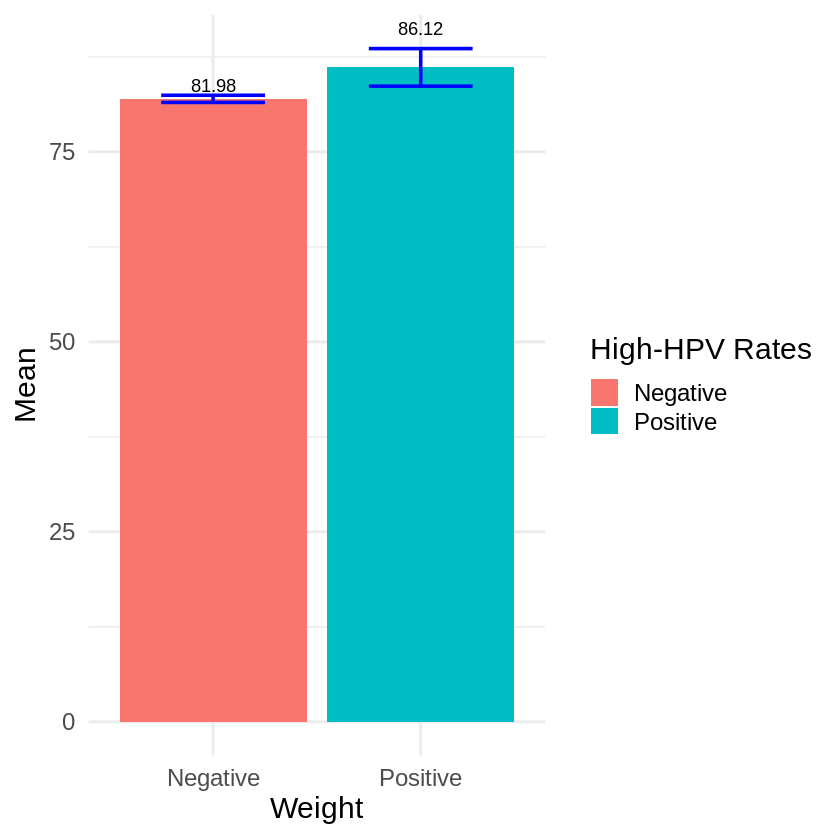

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Weight", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.05)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMXWT, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMXWT = as.numeric(HSV_df_to_use$BMXWT)

t.test(BMXWT ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMXWT by low.HPV
t = -0.97727, df = 41.489, p-value = 0.3341
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -9.280823  3.226329
sample estimates:
mean in group Negative mean in group Positive 
              82.10847               85.13571 



For the t-test above, the p-value( ~ 0.33 )is greater than alpha level (0.05). Hence there is a significant difference in the mean **weight** of the negative (82.10) low HPV and positive (85.13) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(BMXWT, na.rm=TRUE), Min = quantile(BMXWT, 0, na.rm=TRUE), Q1 = quantile(BMXWT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXWT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXWT, 0.75, na.rm=TRUE), Max = quantile(BMXWT, 1, na.rm=TRUE),
   Sd = sd(BMXWT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(BMXWT, na.rm=TRUE), Min = quantile(BMXWT, 0, na.rm=TRUE), Q1 = quantile(BMXWT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXWT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXWT, 0.75, na.rm=TRUE), Max = quantile(BMXWT, 1, na.rm=TRUE),
   Sd = sd(BMXWT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,9023,82.11,32.3,66.200,78.70,93.800,222.6,22.62335,0.47
Positive,42,85.14,51.9,69.775,84.75,94.725,143.3,20.01559,6.24
Total,9065,82.12,32.3,66.200,78.70,93.800,222.6,22.61192,0.47



From the table above those who tested negative for low HPV are roughly 200 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


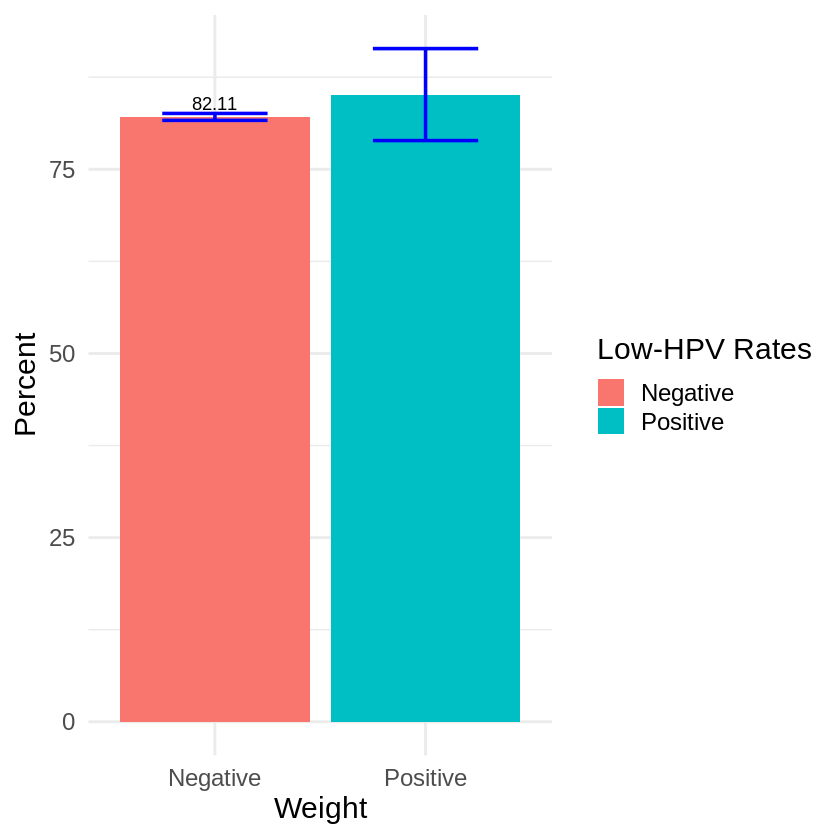

In [ ]:

cat("\n\n\n")
cat("\n\n\n")
ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Weight", y = "Percent", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.05)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Height**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMXHT, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMXHT = as.numeric(HSV_df_to_use$BMXHT)

t.test(BMXHT ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMXHT by high.HPV
t = -9.2893, df = 341.89, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -6.095485 -3.965221
sample estimates:
mean in group Negative mean in group Positive 
              167.1441               172.1744 



For the t-test above, the p-value( 2.2e-16 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **height** of the negative (167.14) high HPV and positive (172.17) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(BMXHT, na.rm=TRUE), Min = quantile(BMXHT, 0, na.rm=TRUE), Q1 = quantile(BMXHT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXHT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXHT, 0.75, na.rm=TRUE), Max = quantile(BMXHT, 1, na.rm=TRUE),
   Sd = sd(BMXHT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(BMXHT, na.rm=TRUE), Min = quantile(BMXHT, 0, na.rm=TRUE), Q1 = quantile(BMXHT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXHT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXHT, 0.75, na.rm=TRUE), Max = quantile(BMXHT, 1, na.rm=TRUE),
   Sd = sd(BMXHT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,8748,167.14,135.4,159.9,166.8,174.2,202.7,9.954767,0.21
Positive,317,172.17,143.2,166.2,172.7,179.0,197.0,9.453447,1.04
Total,9065,167.32,135.4,160.0,167.0,174.5,202.7,9.980044,0.21



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


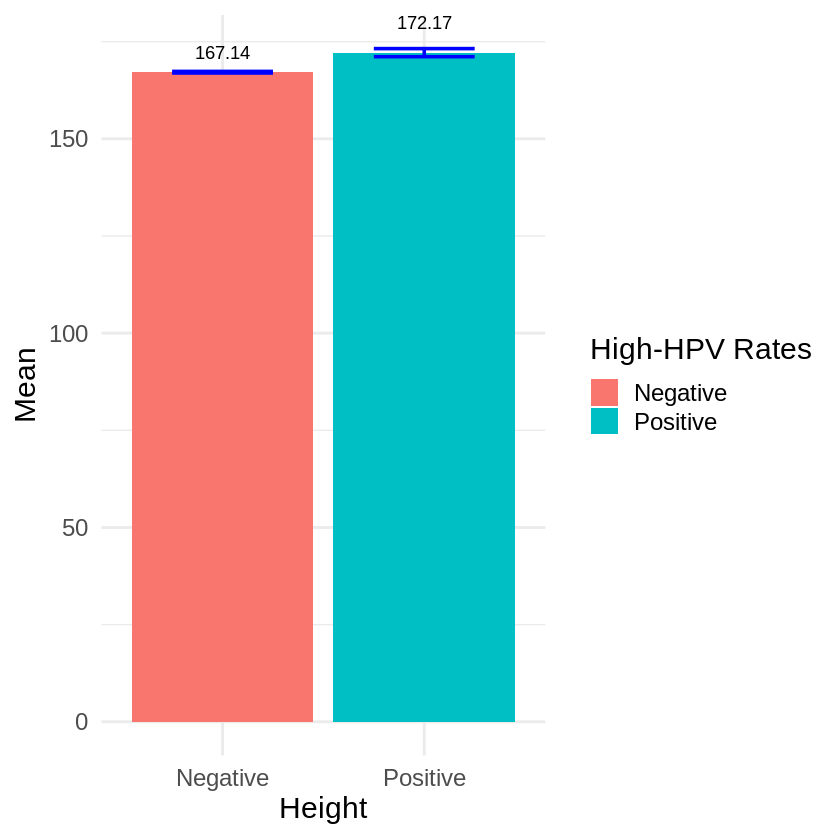

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Height", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(BMXHT, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$BMXHT = as.numeric(HSV_df_to_use$BMXHT)

t.test(BMXHT ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  BMXHT by low.HPV
t = -7.0663, df = 41.814, p-value = 1.196e-08
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -9.652031 -5.363243
sample estimates:
mean in group Negative mean in group Positive 
              167.2852               174.7929 



For the t-test above, the p-value( 2.2e-16 )is less than alpha level (0.05). Hence there is a significant difference in the mean **height** of the negative (167.28) low HPV and positive (174.79) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(BMXHT, na.rm=TRUE), Min = quantile(BMXHT, 0, na.rm=TRUE), Q1 = quantile(BMXHT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXHT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXHT, 0.75, na.rm=TRUE), Max = quantile(BMXHT, 1, na.rm=TRUE),
   Sd = sd(BMXHT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(BMXHT, na.rm=TRUE), Min = quantile(BMXHT, 0, na.rm=TRUE), Q1 = quantile(BMXHT, 0.25, na.rm=TRUE), 
  Q2 = quantile(BMXHT, 0.5, na.rm=TRUE),  Q3 = quantile(BMXHT, 0.75, na.rm=TRUE), Max = quantile(BMXHT, 1, na.rm=TRUE),
   Sd = sd(BMXHT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,9023,167.29,135.4,160,167.00,174.400,202.7,9.979501,0.21
Positive,42,174.79,159.0,172,175.85,180.075,185.3,6.851718,2.14
Total,9065,167.32,135.4,160,167.00,174.500,202.7,9.980044,0.21



From the table above those who tested negative for low HPV are roughly 200 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


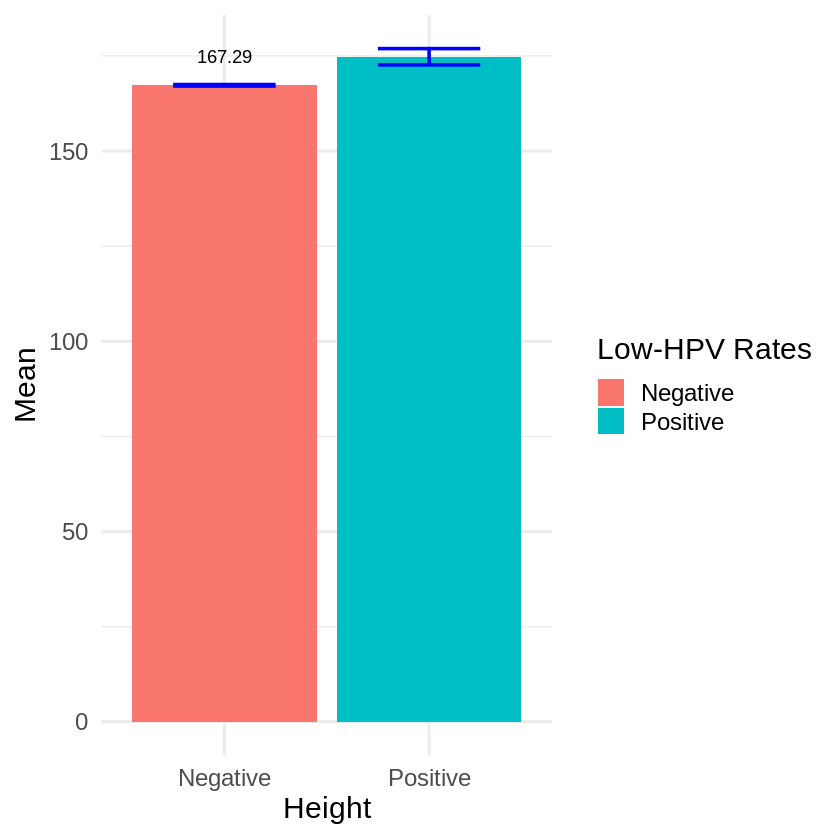

In [ ]:

cat("\n\n\n")

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Height", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Cotinine**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(LBXCOT, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$LBXCOT = as.numeric(HSV_df_to_use$LBXCOT)

t.test(LBXCOT ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")


 


	Welch Two Sample t-test

data:  LBXCOT by high.HPV
t = -5.6211, df = 312.73, p-value = 4.205e-08
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -67.38753 -32.44324
sample estimates:
mean in group Negative mean in group Positive 
              56.48754              106.40293 



For the t-test above, the p-value( 2.2e-16 )is less than alpha level (0.05). Hence there is a significant difference in the mean **cotinine** of the negative (56.50) high HPV and positive (106.40) high HPV.




In [ ]:
high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
summarise(Count = n(), Mean = mean(LBXCOT, na.rm=TRUE), Min = quantile(LBXCOT, 0, na.rm=TRUE), Q1 = quantile(LBXCOT, 0.25, na.rm=TRUE), 
  Q2 = quantile(LBXCOT, 0.5, na.rm=TRUE),  Q3 = quantile(LBXCOT, 0.75, na.rm=TRUE), Max = quantile(LBXCOT, 1, na.rm=TRUE),
   Sd = sd(LBXCOT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(LBXCOT, na.rm=TRUE), Min = quantile(LBXCOT, 0, na.rm=TRUE), Q1 = quantile(LBXCOT, 0.25, na.rm=TRUE), 
  Q2 = quantile(LBXCOT, 0.5, na.rm=TRUE),  Q3 = quantile(LBXCOT, 0.75, na.rm=TRUE), Max = quantile(LBXCOT, 1, na.rm=TRUE),
   Sd = sd(LBXCOT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,8348,56.49,0.011,0.0110,0.039,12.8,1160,125.2722,2.69
Positive,299,106.40,0.011,0.0305,4.490,181.0,627,151.7086,17.27
Total,8647,58.21,0.011,0.0110,0.040,18.5,1160,126.5973,2.67



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are different accross the major quantiles and the variance of the two groups are different.


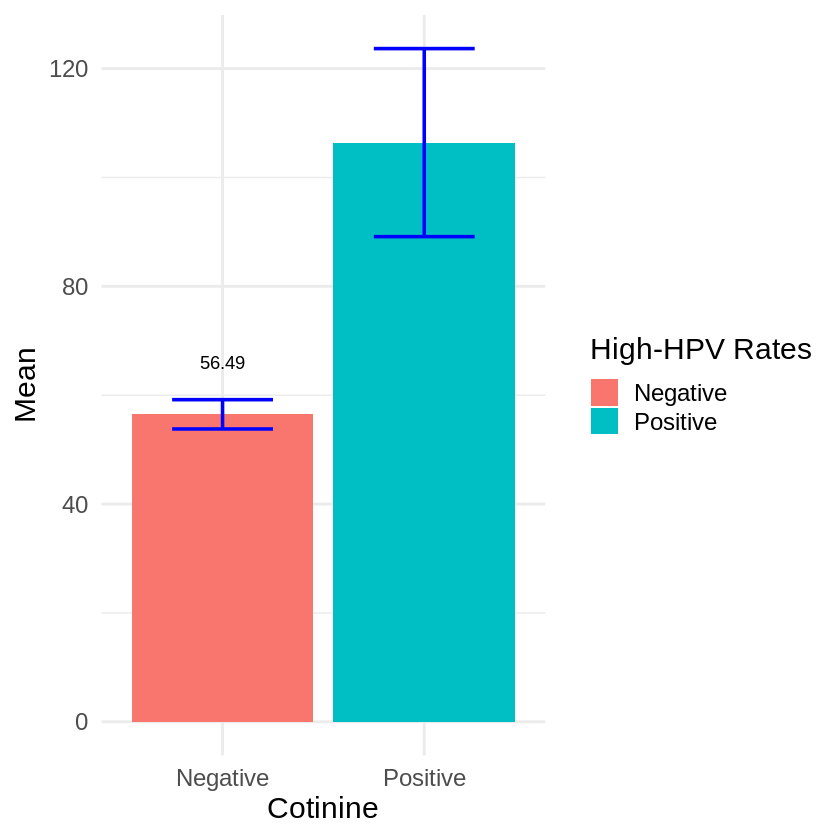

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Cotinine", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(LBXCOT, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$LBXCOT = as.numeric(HSV_df_to_use$LBXCOT)

t.test(LBXCOT ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  LBXCOT by low.HPV
t = -1.8286, df = 39.324, p-value = 0.07505
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -81.807184   4.112461
sample estimates:
mean in group Negative mean in group Positive 
              58.03384               96.88120 



For the t-test above, the p-value(~ 0.08 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **cotinine** of the negative (58.03) low HPV and positive (96.88) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(LBXCOT, na.rm=TRUE), Min = quantile(LBXCOT, 0, na.rm=TRUE), Q1 = quantile(LBXCOT, 0.25, na.rm=TRUE), 
  Q2 = quantile(LBXCOT, 0.5, na.rm=TRUE),  Q3 = quantile(LBXCOT, 0.75, na.rm=TRUE), Max = quantile(LBXCOT, 1, na.rm=TRUE),
   Sd = sd(LBXCOT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(LBXCOT, na.rm=TRUE), Min = quantile(LBXCOT, 0, na.rm=TRUE), Q1 = quantile(LBXCOT, 0.25, na.rm=TRUE), 
  Q2 = quantile(LBXCOT, 0.5, na.rm=TRUE),  Q3 = quantile(LBXCOT, 0.75, na.rm=TRUE), Max = quantile(LBXCOT, 1, na.rm=TRUE),
   Sd = sd(LBXCOT, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,8607,58.03,0.011,0.01100,0.0400,17.65,1160,126.5421,2.67
Positive,40,96.88,0.011,0.04275,1.9925,190.00,412,134.0850,42.88
Total,8647,58.21,0.011,0.01100,0.0400,18.50,1160,126.5973,2.67



From the table above those who tested negative for high HPV are roughly 200 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


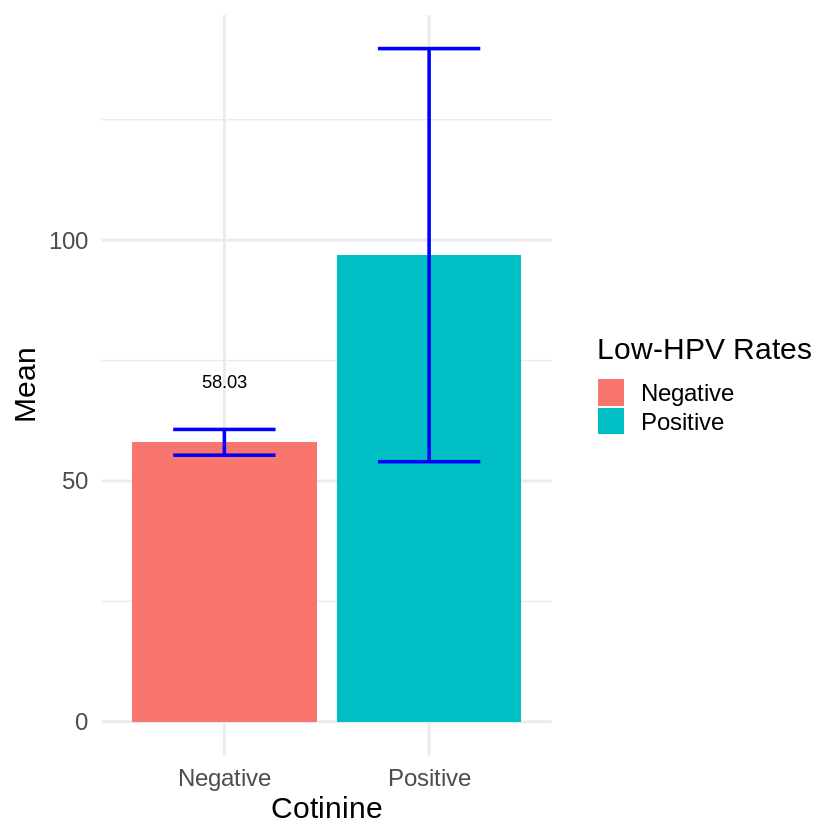

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Cotinine", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Urinary Arsenous Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAS3, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAS3 = as.numeric(HSV_df_to_use$URXUAS3)

t.test(URXUAS3 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAS3 by high.HPV
t = -0.45095, df = 184.44, p-value = 0.6526
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.08762990  0.05502358
sample estimates:
mean in group Negative mean in group Positive 
             0.4894453              0.5057485 



For the t-test above, the p-value( ~ 0.65 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenous acid** of the negative (0.48) high HPV and positive (0.50) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUAS3, na.rm=TRUE), Min = quantile(URXUAS3, 0, na.rm=TRUE), Q1 = quantile(URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS3, 0.75, na.rm=TRUE), Max = quantile(URXUAS3, 1, na.rm=TRUE),
   Sd = sd(URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUAS3, na.rm=TRUE), Min = quantile(URXUAS3, 0, na.rm=TRUE), Q1 = quantile(URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS3, 0.75, na.rm=TRUE), Max = quantile(URXUAS3, 1, na.rm=TRUE),
   Sd = sd(URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,0.49,0.08,0.08,0.40,0.720,8.77,0.4994076,0.02
Positive,167,0.51,0.08,0.08,0.46,0.745,3.22,0.4550406,0.07
Total,3881,0.49,0.08,0.08,0.41,0.720,8.77,0.4975368,0.02



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


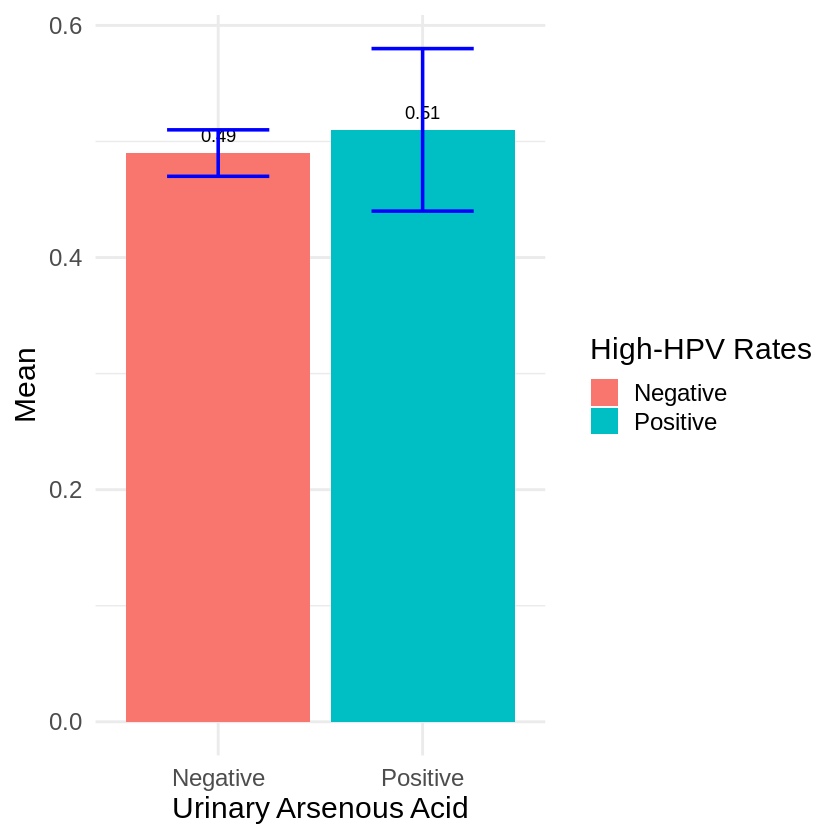

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenous Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAS3, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAS3 = as.numeric(HSV_df_to_use$URXUAS3)

t.test(URXUAS3 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAS3 by low.HPV
t = -0.7624, df = 21.309, p-value = 0.4542
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.2668168  0.1235713
sample estimates:
mean in group Negative mean in group Positive 
             0.4897409              0.5613636 



For the t-test above, the p-value(~ 0.45 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenous acid** of the negative (0.48) low HPV and positive (0.56) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUAS3, na.rm=TRUE), Min = quantile(URXUAS3, 0, na.rm=TRUE), Q1 = quantile(URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS3, 0.75, na.rm=TRUE), Max = quantile(URXUAS3, 1, na.rm=TRUE),
   Sd = sd(URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUAS3, na.rm=TRUE), Min = quantile(URXUAS3, 0, na.rm=TRUE), Q1 = quantile(URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS3, 0.75, na.rm=TRUE), Max = quantile(URXUAS3, 1, na.rm=TRUE),
   Sd = sd(URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,0.49,0.08,0.08,0.400,0.72,8.77,0.4978717,0.02
Positive,22,0.56,0.08,0.15,0.565,0.75,1.88,0.4390281,0.19
Total,3881,0.49,0.08,0.08,0.410,0.72,8.77,0.4975368,0.02



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


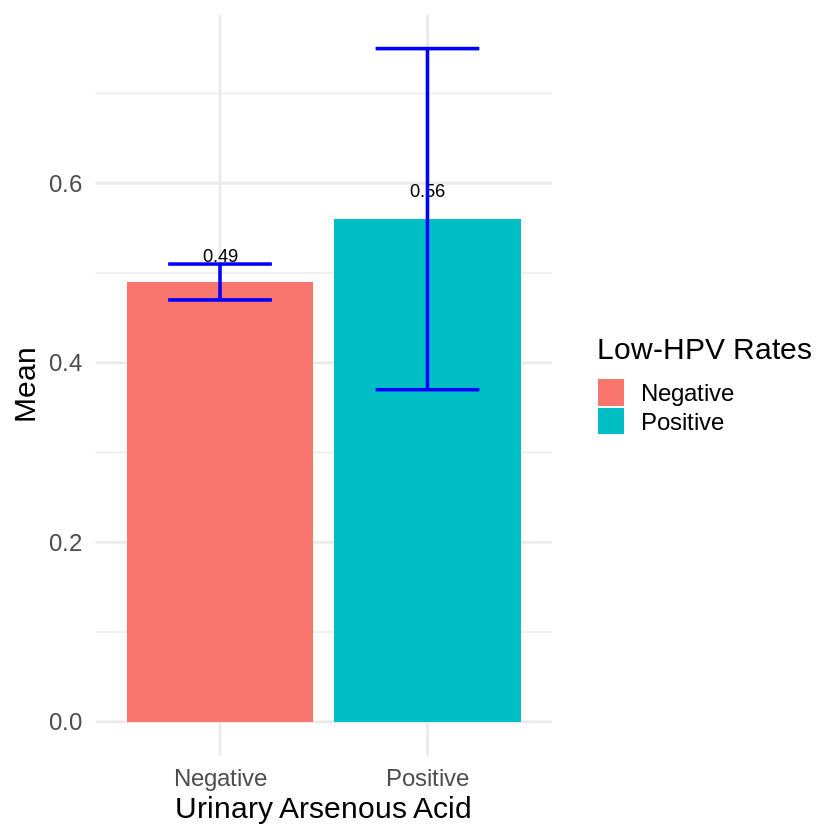

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenous Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Urinary Arsenic acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAS5, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAS5 = as.numeric(HSV_df_to_use$URXUAS5)

t.test(URXUAS5 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAS5 by high.HPV
t = -0.87057, df = 178.16, p-value = 0.3852
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.05456601  0.02115906
sample estimates:
mean in group Negative mean in group Positive 
             0.5794642              0.5961677 



For the t-test above, the p-value( ~0.38 )is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenic acid** of the negative (0.58) high HPV and positive (0.59) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUAS5, na.rm=TRUE), Min = quantile(URXUAS5, 0, na.rm=TRUE), Q1 = quantile(URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS5, 0.75, na.rm=TRUE), Max = quantile(URXUAS5, 1, na.rm=TRUE),
   Sd = sd(URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUAS5, na.rm=TRUE), Min = quantile(URXUAS5, 0, na.rm=TRUE), Q1 = quantile(URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS5, 0.75, na.rm=TRUE), Max = quantile(URXUAS5, 1, na.rm=TRUE),
   Sd = sd(URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,0.58,0.56,0.56,0.56,0.56,8.02,0.2180206,0.01
Positive,167,0.60,0.56,0.56,0.56,0.56,3.36,0.2435994,0.04
Total,3881,0.58,0.56,0.56,0.56,0.56,8.02,0.2191744,0.01




From the table above, the total sample was 9065. Of which 8748  tested negative for high HPV, 317 tested positive for high HPV. 


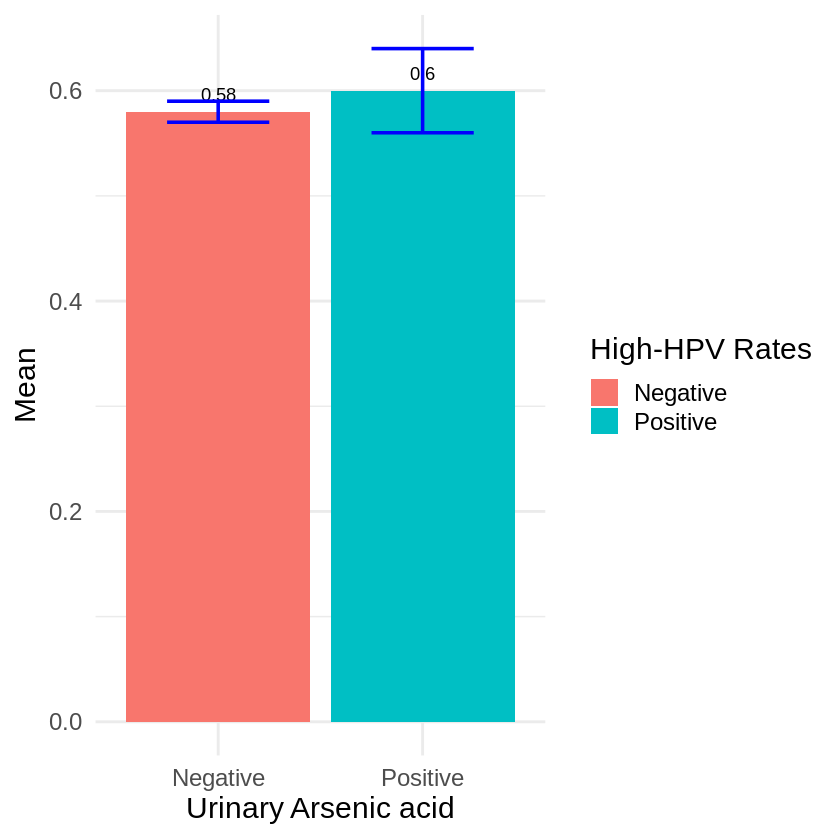

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenic acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAS5, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAS5 = as.numeric(HSV_df_to_use$URXUAS5)

t.test(URXUAS5 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAS5 by low.HPV
t = -0.40811, df = 21.454, p-value = 0.6872
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.08517127  0.05719676
sample estimates:
mean in group Negative mean in group Positive 
             0.5801037              0.5940909 



For the t-test above, the p-value( ~0.68 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenic acid** of the negative (0.58) low HPV and positive (0.59) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUAS5, na.rm=TRUE), Min = quantile(URXUAS5, 0, na.rm=TRUE), Q1 = quantile(URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS5, 0.75, na.rm=TRUE), Max = quantile(URXUAS5, 1, na.rm=TRUE),
   Sd = sd(URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUAS5, na.rm=TRUE), Min = quantile(URXUAS5, 0, na.rm=TRUE), Q1 = quantile(URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAS5, 0.75, na.rm=TRUE), Max = quantile(URXUAS5, 1, na.rm=TRUE),
   Sd = sd(URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,0.58,0.56,0.56,0.56,0.56,8.02,0.2194791,0.01
Positive,22,0.59,0.56,0.56,0.56,0.56,1.31,0.1599005,0.07
Total,3881,0.58,0.56,0.56,0.56,0.56,8.02,0.2191744,0.01


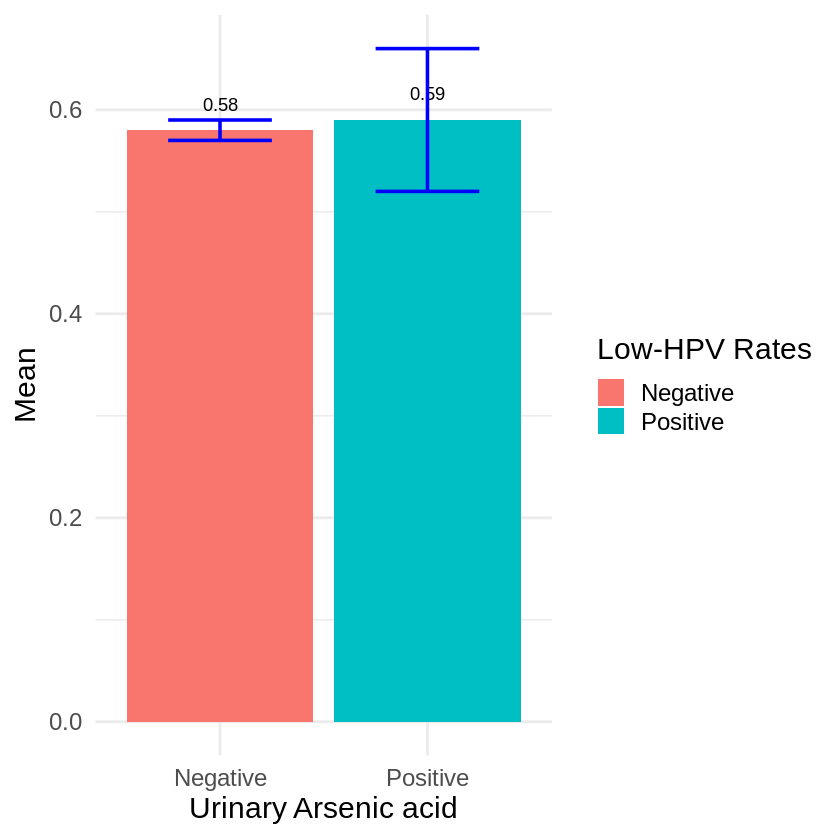

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenic acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Urinary Arsenobetaine(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAB, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAB = as.numeric(HSV_df_to_use$URXUAB)

t.test(URXUAB ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAB by high.HPV
t = 1.5838, df = 201.8, p-value = 0.1148
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.6131646  5.6197661
sample estimates:
mean in group Negative mean in group Positive 
              8.097073               5.593772 





For the t-test above, the p-value( 0.11 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenobetaine** of the negative (8.09) high HPV and positive (5.59) high HPV.





In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUAB, na.rm=TRUE), Min = quantile(URXUAB, 0, na.rm=TRUE), Q1 = quantile(URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAB, 0.75, na.rm=TRUE), Max = quantile(URXUAB, 1, na.rm=TRUE),
   Sd = sd(URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUAB, na.rm=TRUE), Min = quantile(URXUAB, 0, na.rm=TRUE), Q1 = quantile(URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAB, 0.75, na.rm=TRUE), Max = quantile(URXUAB, 1, na.rm=TRUE),
   Sd = sd(URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,8.10,0.82,0.82,0.82,4.29,749,29.41101,0.95
Positive,167,5.59,0.82,0.82,0.82,2.98,214,19.44946,2.97
Total,3881,7.99,0.82,0.82,0.82,4.23,749,29.05544,0.91



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly different accross the quantiles and the variance of the two groups are different.


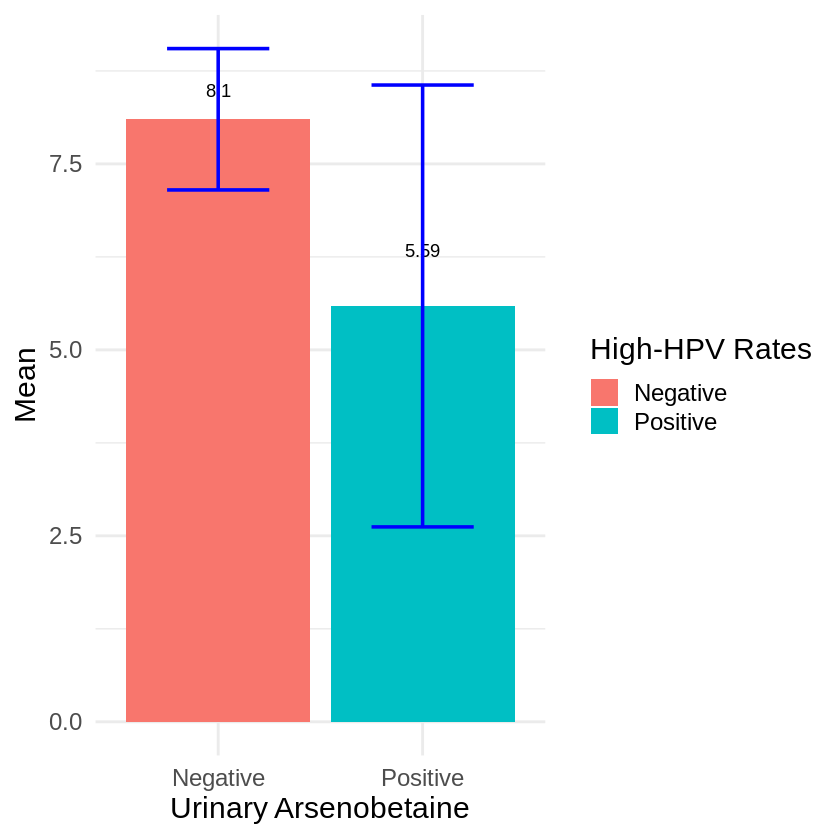

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
   #geom_point( colour = "red", size = 7) +
  labs(x = "Urinary Arsenobetaine", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAB, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAB = as.numeric(HSV_df_to_use$URXUAB)

t.test(URXUAB ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAB by low.HPV
t = 3.3138, df = 27.933, p-value = 0.002554
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 1.627100 6.896291
sample estimates:
mean in group Negative mean in group Positive 
              8.013514               3.751818 





For the t-test above, the p-value( ~0.002 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **urinary arsenobetaine** of the negative (8.01) low HPV and positive (3.0) low HPV.





In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUAB, na.rm=TRUE), Min = quantile(URXUAB, 0, na.rm=TRUE), Q1 = quantile(URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAB, 0.75, na.rm=TRUE), Max = quantile(URXUAB, 1, na.rm=TRUE),
   Sd = sd(URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUAB, na.rm=TRUE), Min = quantile(URXUAB, 0, na.rm=TRUE), Q1 = quantile(URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAB, 0.75, na.rm=TRUE), Max = quantile(URXUAB, 1, na.rm=TRUE),
   Sd = sd(URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,8.01,0.82,0.82,0.82,4.2300,749.0,29.133452,0.92
Positive,22,3.75,0.82,0.82,0.82,2.9675,21.6,5.616616,2.49
Total,3881,7.99,0.82,0.82,0.82,4.2300,749.0,29.055441,0.91



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are different.


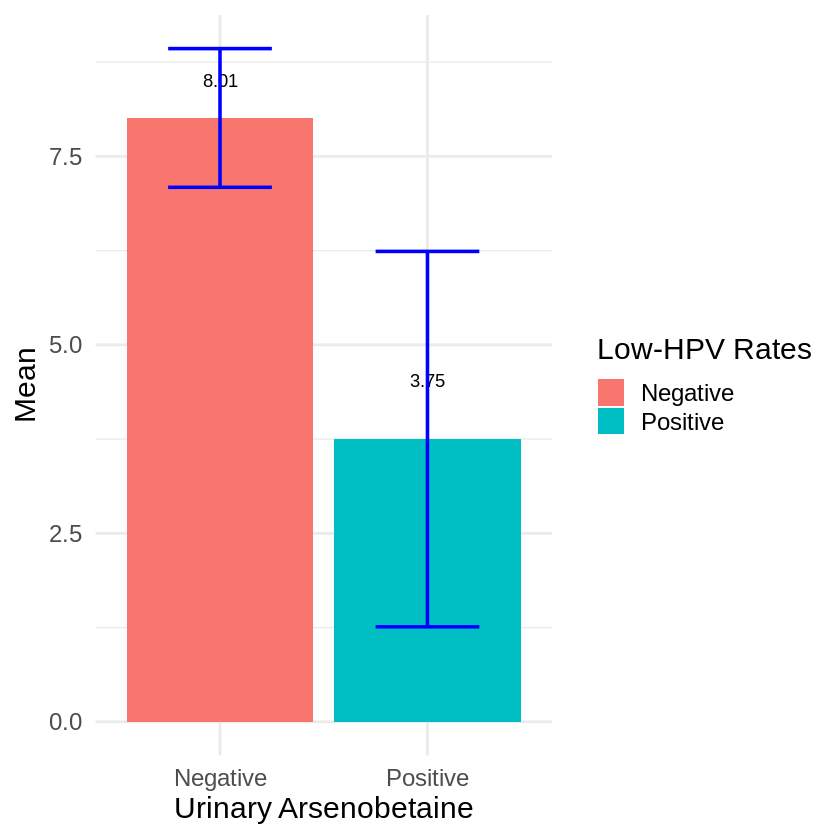

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  #geom_point( colour = "red", size = 7) +
  labs(x = "Urinary Arsenobetaine", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Urinary Arsenocholine(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAC, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAC = as.numeric(HSV_df_to_use$URXUAC)

t.test(URXUAC ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAC by high.HPV
t = 3.3874, df = 469.61, p-value = 0.0007648
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 0.01470528 0.05533506
sample estimates:
mean in group Negative mean in group Positive 
             0.1463974              0.1113772 





For the t-test above, the p-value( ~0.0007 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **urinary arsenocholine** of the negative (0.14) high HPV and positive (0.11) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUAC, na.rm=TRUE), Min = quantile(URXUAC, 0, na.rm=TRUE), Q1 = quantile(URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAC, 0.75, na.rm=TRUE), Max = quantile(URXUAC, 1, na.rm=TRUE),
   Sd = sd(URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUAC, na.rm=TRUE), Min = quantile(URXUAC, 0, na.rm=TRUE), Q1 = quantile(URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAC, 0.75, na.rm=TRUE), Max = quantile(URXUAC, 1, na.rm=TRUE),
   Sd = sd(URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,0.15,0.08,0.08,0.08,0.08,14.20,0.4043368,0.01
Positive,167,0.11,0.08,0.08,0.08,0.08,0.69,0.1024573,0.02
Total,3881,0.14,0.08,0.08,0.08,0.08,14.20,0.3961706,0.01



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are different.


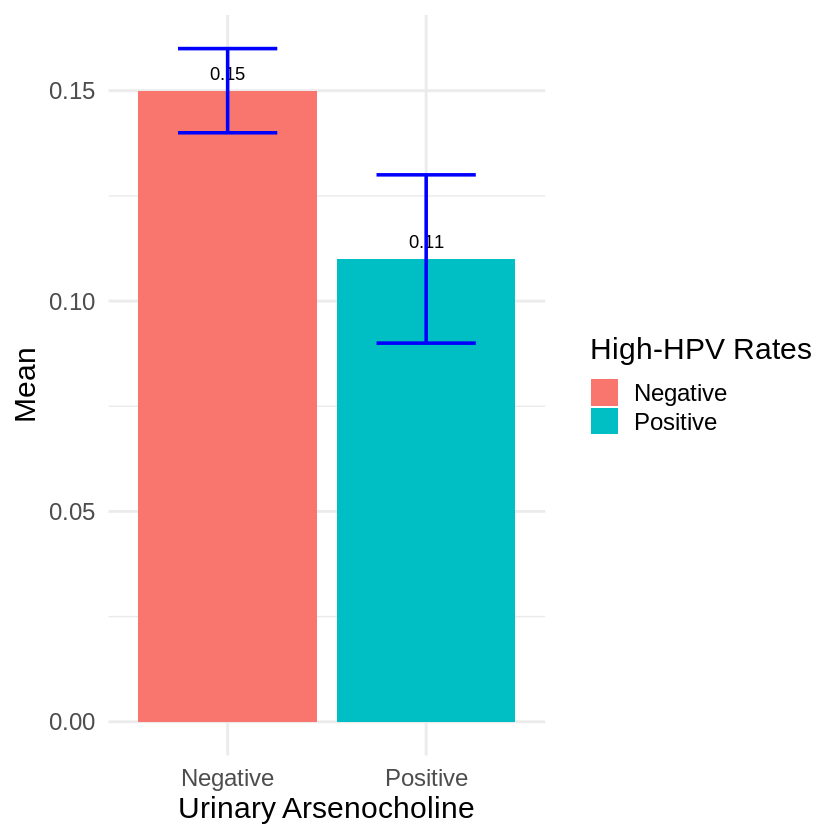

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenocholine", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUAC, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUAC = as.numeric(HSV_df_to_use$URXUAC)

t.test(URXUAC ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUAC by low.HPV
t = 4.071, df = 42.276, p-value = 0.0002008
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 0.02415426 0.07162420
sample estimates:
mean in group Negative mean in group Positive 
            0.14516196             0.09727273 





For the t-test above, the p-value( ~0.0002 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **urinary arsenocholine** of the negative (0.15) low HPV and positive (0.09) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUAC, na.rm=TRUE), Min = quantile(URXUAC, 0, na.rm=TRUE), Q1 = quantile(URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAC, 0.75, na.rm=TRUE), Max = quantile(URXUAC, 1, na.rm=TRUE),
   Sd = sd(URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUAC, na.rm=TRUE), Min = quantile(URXUAC, 0, na.rm=TRUE), Q1 = quantile(URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(URXUAC, 0.75, na.rm=TRUE), Max = quantile(URXUAC, 1, na.rm=TRUE),
   Sd = sd(URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,0.15,0.08,0.08,0.08,0.08,14.20,0.3972676,0.01
Positive,22,0.10,0.08,0.08,0.08,0.08,0.24,0.0463097,0.02
Total,3881,0.14,0.08,0.08,0.08,0.08,14.20,0.3961706,0.01



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are fairly the same.


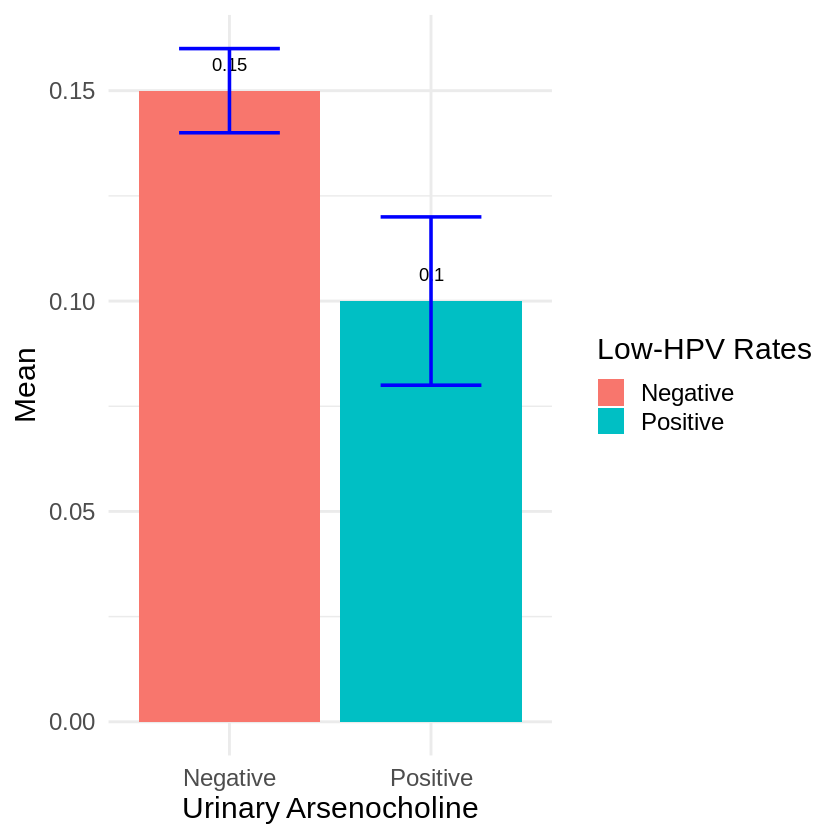

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Arsenocholine", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Urinary Dimethylarsinic Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUDMA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUDMA = as.numeric(HSV_df_to_use$URXUDMA)

t.test(URXUDMA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")





	Welch Two Sample t-test

data:  URXUDMA by high.HPV
t = -0.068079, df = 179.38, p-value = 0.9458
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.9868567  0.9210336
sample estimates:
mean in group Negative mean in group Positive 
              4.983675               5.016587 





For the t-test above, the p-value(~ 0.9 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary dimethylarsinic acid** of the negative (4.98) high HPV and positive (5.01) high HPV.




In [ ]:
high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
summarise(Count = n(), Mean = mean(URXUDMA, na.rm=TRUE), Min = quantile(URXUDMA, 0, na.rm=TRUE), Q1 = quantile(URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUDMA, 0.75, na.rm=TRUE), Max = quantile(URXUDMA, 1, na.rm=TRUE),
   Sd = sd(URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUDMA, na.rm=TRUE), Min = quantile(URXUDMA, 0, na.rm=TRUE), Q1 = quantile(URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUDMA, 0.75, na.rm=TRUE), Max = quantile(URXUDMA, 1, na.rm=TRUE),
   Sd = sd(URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var


# cat("\n\n\n")



high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,4.98,1.35,1.350,3.31,5.780,84.7,5.747106,0.18
Positive,167,5.02,1.35,1.925,3.72,5.345,49.0,6.127302,0.94
Total,3881,4.99,1.35,1.350,3.33,5.750,84.7,5.763151,0.18



For the t-test above, the p-value is less than alpha level (0.05). Thus, the data provides enough evidence against the null. Hence there is at least a difference in the means of the negative high HPV and positive high HPV.


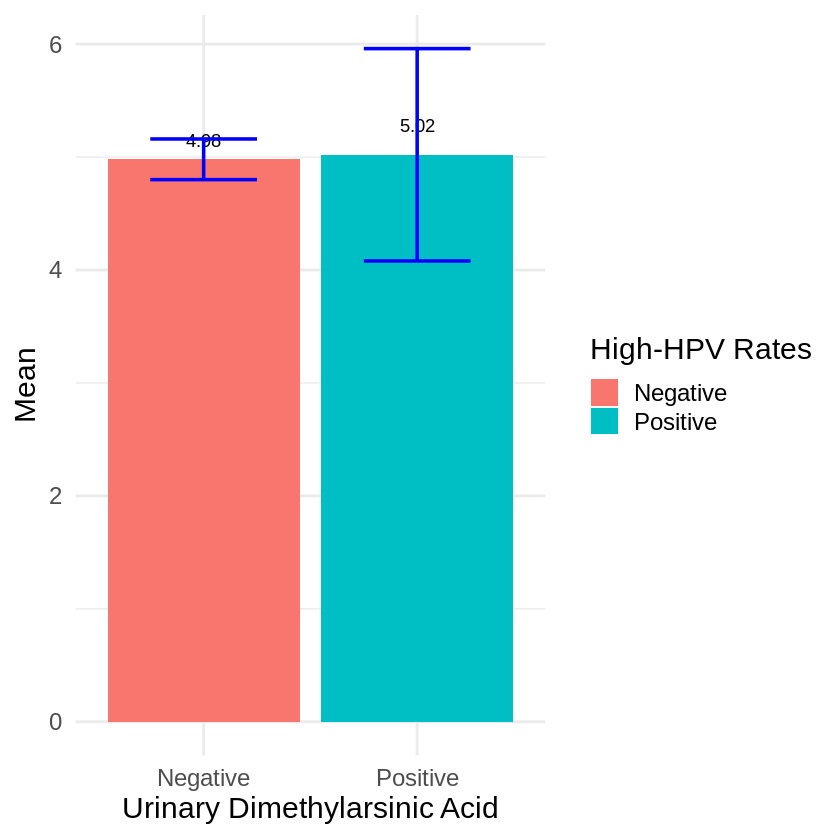

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Dimethylarsinic Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUDMA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUDMA = as.numeric(HSV_df_to_use$URXUDMA)

t.test(URXUDMA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUDMA by low.HPV
t = 2.3256, df = 22.006, p-value = 0.02965
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 0.1539329 2.6896420
sample estimates:
mean in group Negative mean in group Positive 
              4.993151               3.571364 





For the t-test above, the p-value(~ 0.03 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **urinary dimethylarsinic acid** of the negative (4.99) low HPV and positive (3.57) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUDMA, na.rm=TRUE), Min = quantile(URXUDMA, 0, na.rm=TRUE), Q1 = quantile(URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUDMA, 0.75, na.rm=TRUE), Max = quantile(URXUDMA, 1, na.rm=TRUE),
   Sd = sd(URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUDMA, na.rm=TRUE), Min = quantile(URXUDMA, 0, na.rm=TRUE), Q1 = quantile(URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUDMA, 0.75, na.rm=TRUE), Max = quantile(URXUDMA, 1, na.rm=TRUE),
   Sd = sd(URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,4.99,1.35,1.3500,3.340,5.7700,84.70,5.774784,0.18
Positive,22,3.57,1.35,1.4975,2.225,4.2875,12.61,2.834168,1.26
Total,3881,4.99,1.35,1.3500,3.330,5.7500,84.70,5.763151,0.18



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for high low in number. Also, the distributions are roughly different accross the quantiles and the variance of the two groups are different.


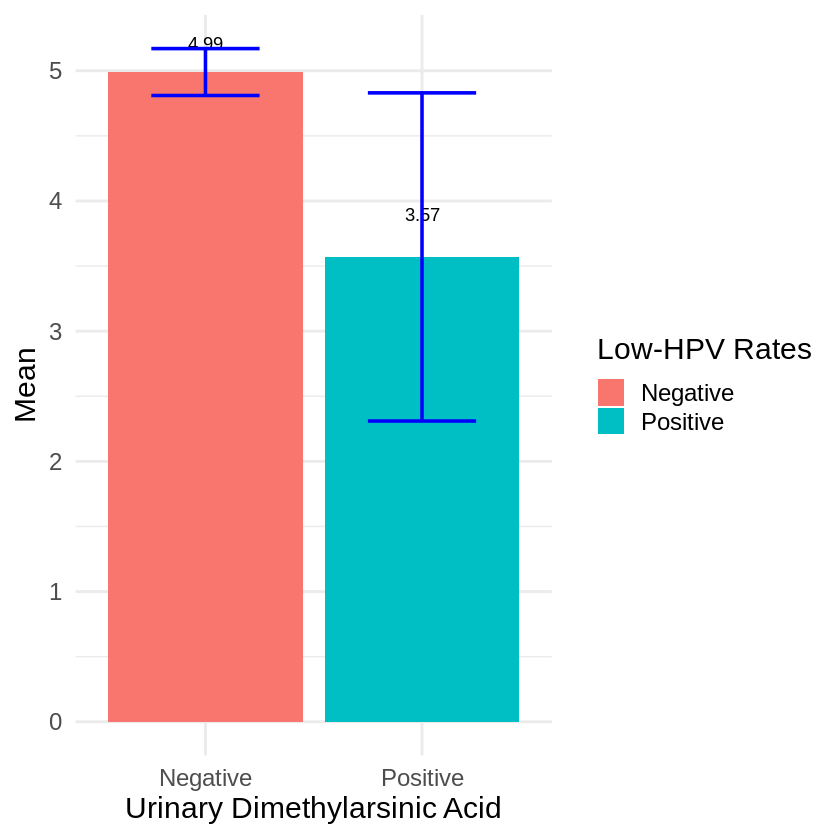

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Dimethylarsinic Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)






The bar plot above shows the means of the negative and positive values for low HPV. 

## **Urinary Monomethylarsonic Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUMMA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUMMA = as.numeric(HSV_df_to_use$URXUMMA)

t.test(URXUMMA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUMMA by high.HPV
t = -1.5182, df = 184.69, p-value = 0.1307
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.17432497  0.02270437
sample estimates:
mean in group Negative mean in group Positive 
             0.6159262              0.6917365 





For the t-test above, the p-value( ~ 0.13 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary monomethylarsonic acid** of the negative (0.61) high HPV and positive (0.69) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(URXUMMA, na.rm=TRUE), Min = quantile(URXUMMA, 0, na.rm=TRUE), Q1 = quantile(URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUMMA, 0.75, na.rm=TRUE), Max = quantile(URXUMMA, 1, na.rm=TRUE),
   Sd = sd(URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(URXUMMA, na.rm=TRUE), Min = quantile(URXUMMA, 0, na.rm=TRUE), Q1 = quantile(URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUMMA, 0.75, na.rm=TRUE), Max = quantile(URXUMMA, 1, na.rm=TRUE),
   Sd = sd(URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,0.62,0.14,0.140,0.46,0.83,17.00,0.6940142,0.02
Positive,167,0.69,0.14,0.175,0.56,0.97,5.03,0.6282860,0.10
Total,3881,0.62,0.14,0.140,0.46,0.84,17.00,0.6914116,0.02



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are roughly similar.


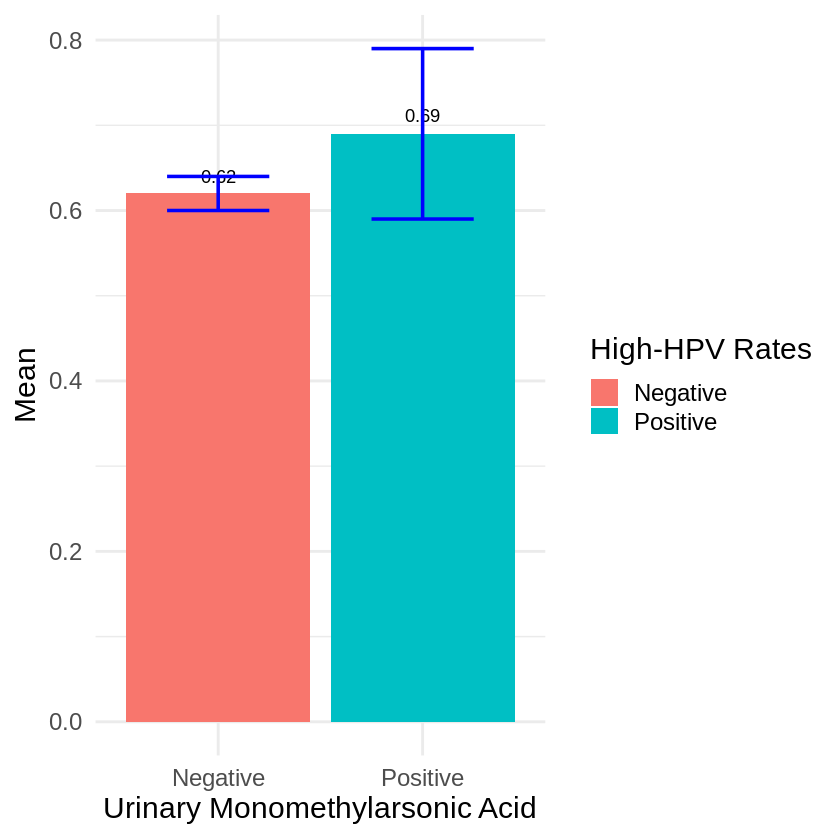

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Monomethylarsonic Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(URXUMMA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$URXUMMA = as.numeric(HSV_df_to_use$URXUMMA)

t.test(URXUMMA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  URXUMMA by low.HPV
t = 0.029467, df = 21.423, p-value = 0.9768
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.2291743  0.2357702
sample estimates:
mean in group Negative mean in group Positive 
             0.6192070              0.6159091 





For the t-test above, the p-value(~ 0.97 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary monomethylarsonic acid** of the negative (0.62) low HPV and positive (0.62) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(URXUMMA, na.rm=TRUE), Min = quantile(URXUMMA, 0, na.rm=TRUE), Q1 = quantile(URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUMMA, 0.75, na.rm=TRUE), Max = quantile(URXUMMA, 1, na.rm=TRUE),
   Sd = sd(URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(URXUMMA, na.rm=TRUE), Min = quantile(URXUMMA, 0, na.rm=TRUE), Q1 = quantile(URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(URXUMMA, 0.75, na.rm=TRUE), Max = quantile(URXUMMA, 1, na.rm=TRUE),
   Sd = sd(URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,0.62,0.14,0.14,0.46,0.8300,17.00,0.6923083,0.02
Positive,22,0.62,0.14,0.16,0.45,0.9375,2.27,0.5223451,0.23
Total,3881,0.62,0.14,0.14,0.46,0.8400,17.00,0.6914116,0.02



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


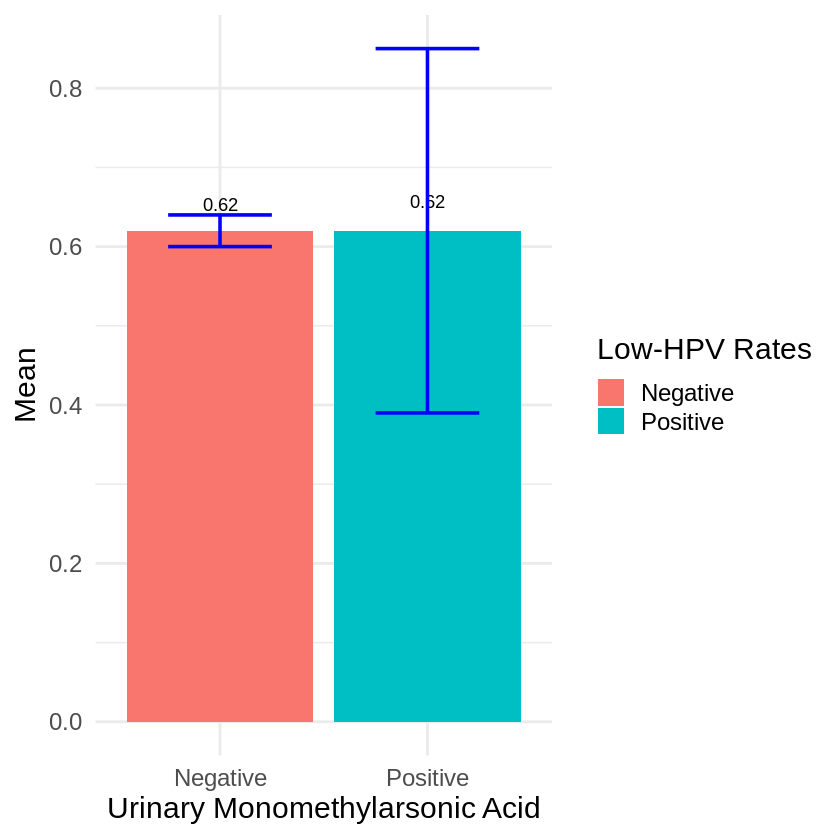

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Urinary Monomethylarsonic Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Urinary Arsenous Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAS3, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAS3 = as.numeric(HSV_df_to_use$ln.URXUAS3)

t.test(ln.URXUAS3 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAS3 by high.HPV
t = -0.96268, df = 181.99, p-value = 0.337
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.24281451  0.08357016
sample estimates:
mean in group Negative mean in group Positive 
             -1.219139              -1.139517 





For the t-test above, the p-value(~ 0.34 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenous acid** of the negative (-1.22) high HPV and positive (-1.14) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUAS3, na.rm=TRUE), Min = quantile(ln.URXUAS3, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS3, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS3, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAS3, na.rm=TRUE), Min = quantile(ln.URXUAS3, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS3, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS3, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,-1.22,-2.525729,-2.525729,-0.9162907,-0.3285041,2.171337,1.069144,0.03
Positive,167,-1.14,-2.525729,-2.525729,-0.7765288,-0.2943936,1.169381,1.044518,0.16
Total,3881,-1.22,-2.525729,-2.525729,-0.8915981,-0.3285041,2.171337,1.068087,0.03



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


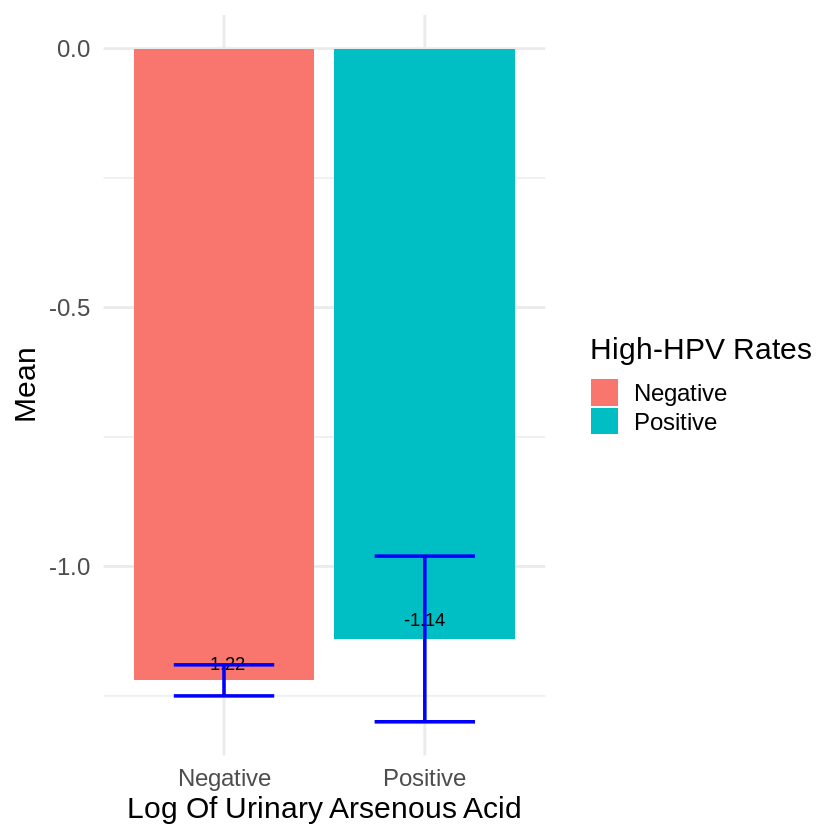

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenous Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAS3, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAS3 = as.numeric(HSV_df_to_use$ln.URXUAS3)

t.test(ln.URXUAS3 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAS3 by low.HPV
t = -1.0828, df = 21.254, p-value = 0.291
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.7024270  0.2211654
sample estimates:
mean in group Negative mean in group Positive 
            -1.2170767             -0.9764459 





For the t-test above, the p-value(~ 0.29 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenous acid** of the negative (-1.22) low HPV and positive (-0.98) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUAS3, na.rm=TRUE), Min = quantile(ln.URXUAS3, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS3, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS3, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAS3, na.rm=TRUE), Min = quantile(ln.URXUAS3, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS3, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS3, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS3, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS3, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS3, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,-1.22,-2.525729,-2.525729,-0.9162907,-0.3285041,2.1713368,1.068227,0.03
Positive,22,-0.98,-2.525729,-2.149709,-0.5712821,-0.2879537,0.6312718,1.039179,0.46
Total,3881,-1.22,-2.525729,-2.525729,-0.8915981,-0.3285041,2.1713368,1.068087,0.03



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


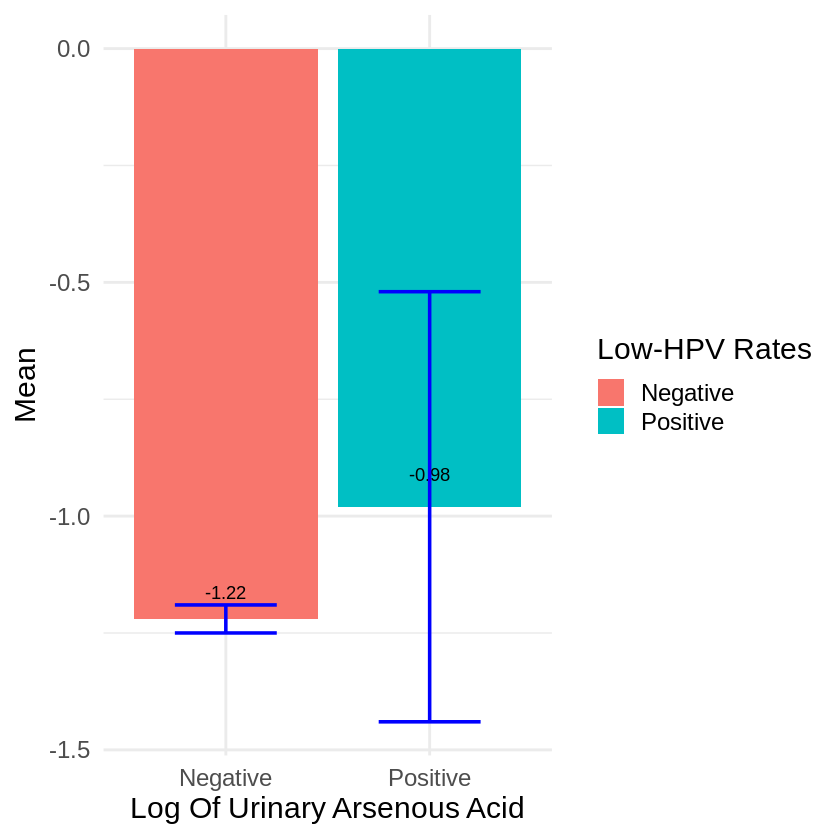

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenous Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for low HPV. 


## **Urinary Arsenic acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAS5, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAS5 = as.numeric(HSV_df_to_use$ln.URXUAS5)

t.test(ln.URXUAS5 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAS5 by high.HPV
t = -1.0491, df = 173.51, p-value = 0.2956
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.04497108  0.01375522
sample estimates:
mean in group Negative mean in group Positive 
            -0.5619526             -0.5463447 





For the t-test above, the p-value( ~0.34 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenic acid** of the negative (-0.56) high HPV and positive (-0.55) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUAS5, na.rm=TRUE), Min = quantile(ln.URXUAS5, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS5, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS5, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAS5, na.rm=TRUE), Min = quantile(ln.URXUAS5, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS5, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS5, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,-0.56,-0.5798185,-0.5798185,-0.5798185,-0.5798185,2.081938,0.1341257,0.00
Positive,167,-0.55,-0.5798185,-0.5798185,-0.5798185,-0.5798185,1.211941,0.1901376,0.03
Total,3881,-0.56,-0.5798185,-0.5798185,-0.5798185,-0.5798185,2.081938,0.1370115,0.00



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


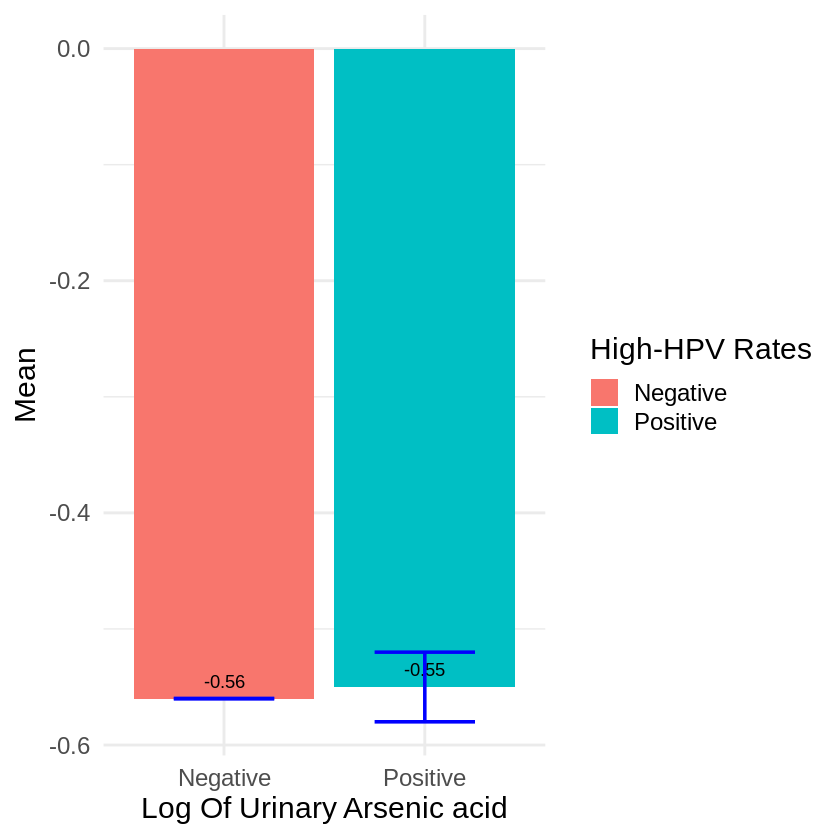

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenic acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAS5, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAS5 = as.numeric(HSV_df_to_use$ln.URXUAS5)

t.test(ln.URXUAS5 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAS5 by low.HPV
t = -0.52224, df = 21.137, p-value = 0.6069
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.10063921  0.06022638
sample estimates:
mean in group Negative mean in group Positive 
            -0.5613956             -0.5411891 





For the t-test above, the p-value(~ 0.61 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **urinary arsenic acid** of the negative (-0.56) low HPV and positive (-0.54) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUAS5, na.rm=TRUE), Min = quantile(ln.URXUAS5, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS5, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS5, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAS5, na.rm=TRUE), Min = quantile(ln.URXUAS5, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAS5, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAS5, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAS5, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAS5, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAS5, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,-0.56,-0.5798185,-0.5798185,-0.5798185,-0.5798185,2.0819384,0.1367413,0.00
Positive,22,-0.54,-0.5798185,-0.5798185,-0.5798185,-0.5798185,0.2700271,0.1811877,0.08
Total,3881,-0.56,-0.5798185,-0.5798185,-0.5798185,-0.5798185,2.0819384,0.1370115,0.00



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


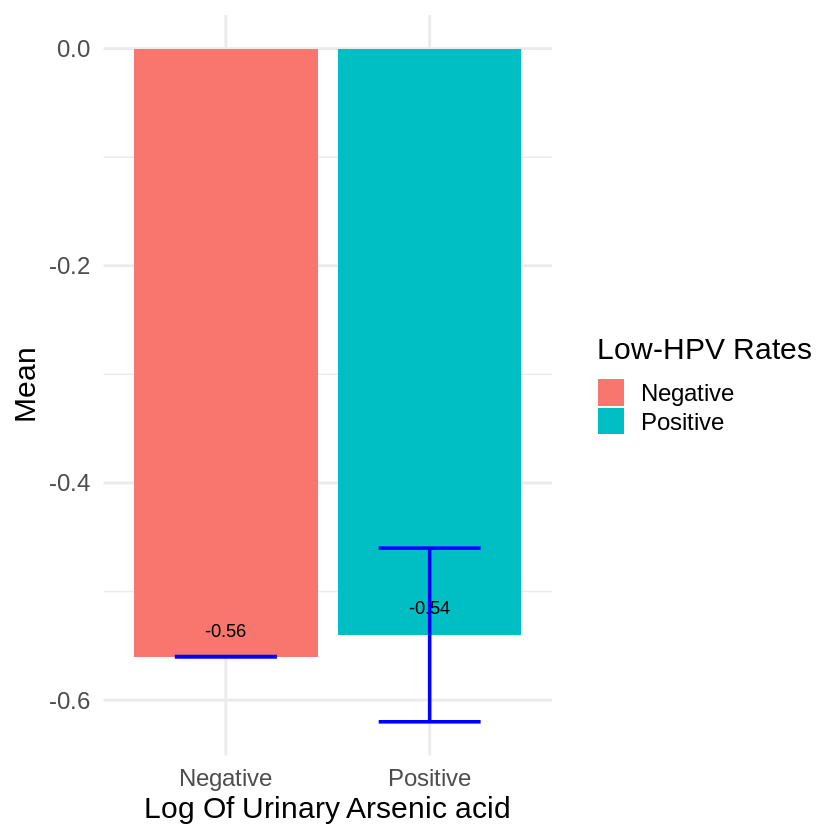

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenic acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)








The bar plot above shows the means of the negative and positive values for low HPV. 


## **Log Of Urinary Arsenobetaine(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAB, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAB = as.numeric(HSV_df_to_use$ln.URXUAB)

t.test(ln.URXUAB ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAB by high.HPV
t = 1.6442, df = 186.34, p-value = 0.1018
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.02983377  0.32841518
sample estimates:
mean in group Negative mean in group Positive 
             0.7465806              0.5972899 





For the t-test above, the p-value(~ 0.10 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary arsenobetaine** of the negative (0.74) high HPV and positive (0.59) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUAB, na.rm=TRUE), Min = quantile(ln.URXUAB, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAB, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAB, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAB, na.rm=TRUE), Min = quantile(ln.URXUAB, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAB, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAB, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,0.75,-0.1984509,-0.1984509,-0.1984509,1.456287,6.618739,1.312283,0.04
Positive,167,0.60,-0.1984509,-0.1984509,-0.1984509,1.091563,5.365976,1.139897,0.17
Total,3881,0.74,-0.1984509,-0.1984509,-0.1984509,1.442202,6.618739,1.305555,0.04



From the table above those who tested negative for low HPV are roughly 22 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


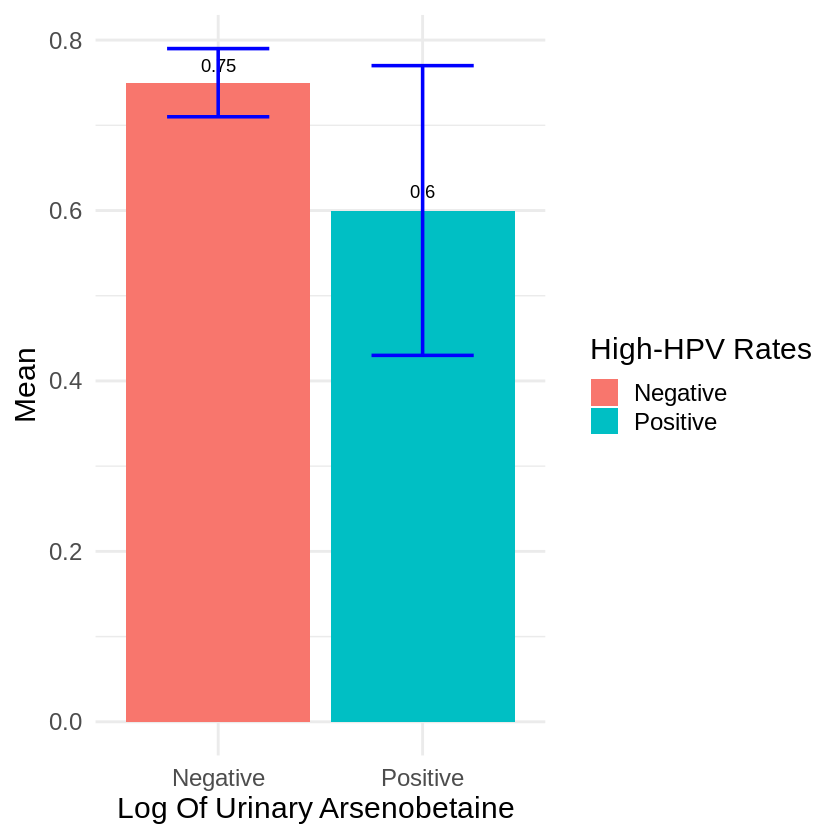

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenobetaine ", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAB, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAB = as.numeric(HSV_df_to_use$ln.URXUAB)

t.test(ln.URXUAB ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAB by low.HPV
t = 0.62342, df = 21.335, p-value = 0.5396
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.3444597  0.6397984
sample estimates:
mean in group Negative mean in group Positive 
             0.7409936              0.5933243 





For the t-test above, the p-value( ~ 0.54 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary arsenobetaine** of the negative (0.74) low HPV and positive (0.59) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUAB, na.rm=TRUE), Min = quantile(ln.URXUAB, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAB, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAB, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAB, na.rm=TRUE), Min = quantile(ln.URXUAB, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAB, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAB, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAB, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAB, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAB, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,0.74,-0.1984509,-0.1984509,-0.1984509,1.442202,6.618739,1.306677,0.04
Positive,22,0.59,-0.1984509,-0.1984509,-0.1984509,1.074193,3.072693,1.106633,0.49
Total,3881,0.74,-0.1984509,-0.1984509,-0.1984509,1.442202,6.618739,1.305555,0.04



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


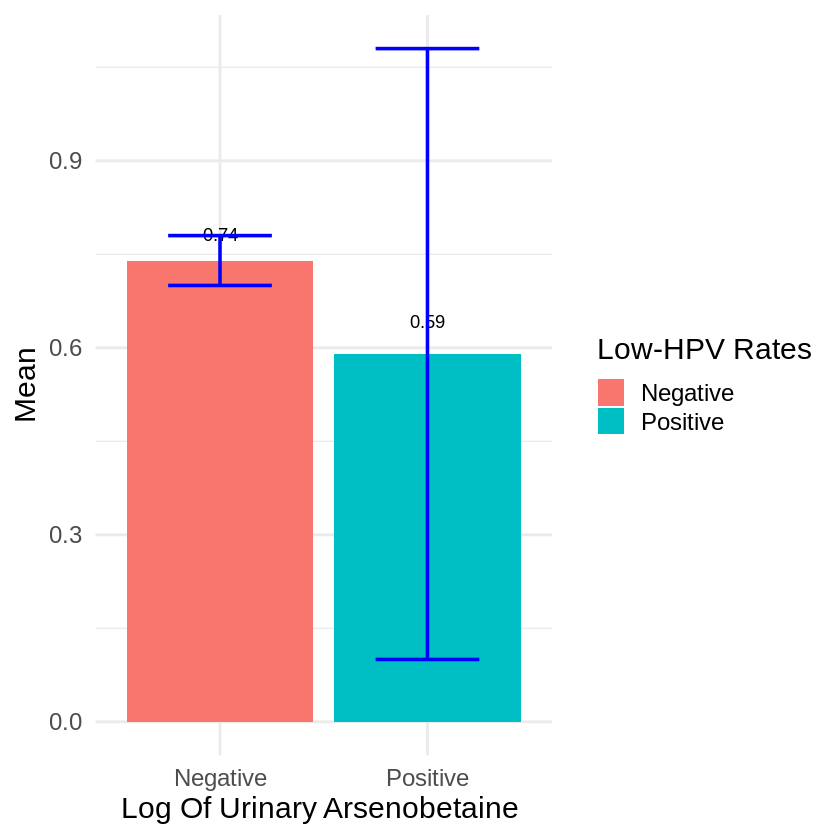

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenobetaine ", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)








The bar plot above shows the means of the negative and positive values for low HPV. 


## **Log Of Urinary Arsenocholine(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAC, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAC = as.numeric(HSV_df_to_use$ln.URXUAC)

t.test(ln.URXUAC ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAC by high.HPV
t = 1.8411, df = 193.02, p-value = 0.06715
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.004763805  0.138387867
sample estimates:
mean in group Negative mean in group Positive 
             -2.289692              -2.356504 





For the t-test above, the p-value(~ 0.06 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary arsenocholine** of the negative (-2.29) high HPV and positive (-2.35) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUAC, na.rm=TRUE), Min = quantile(ln.URXUAC, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAC, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAC, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAC, na.rm=TRUE), Min = quantile(ln.URXUAC, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAC, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAC, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,-2.29,-2.525729,-2.525729,-2.525729,-2.525729,2.6532420,0.5965932,0.02
Positive,167,-2.36,-2.525729,-2.525729,-2.525729,-2.525729,-0.3710637,0.4515847,0.07
Total,3881,-2.29,-2.525729,-2.525729,-2.525729,-2.525729,2.6532420,0.5911960,0.02



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


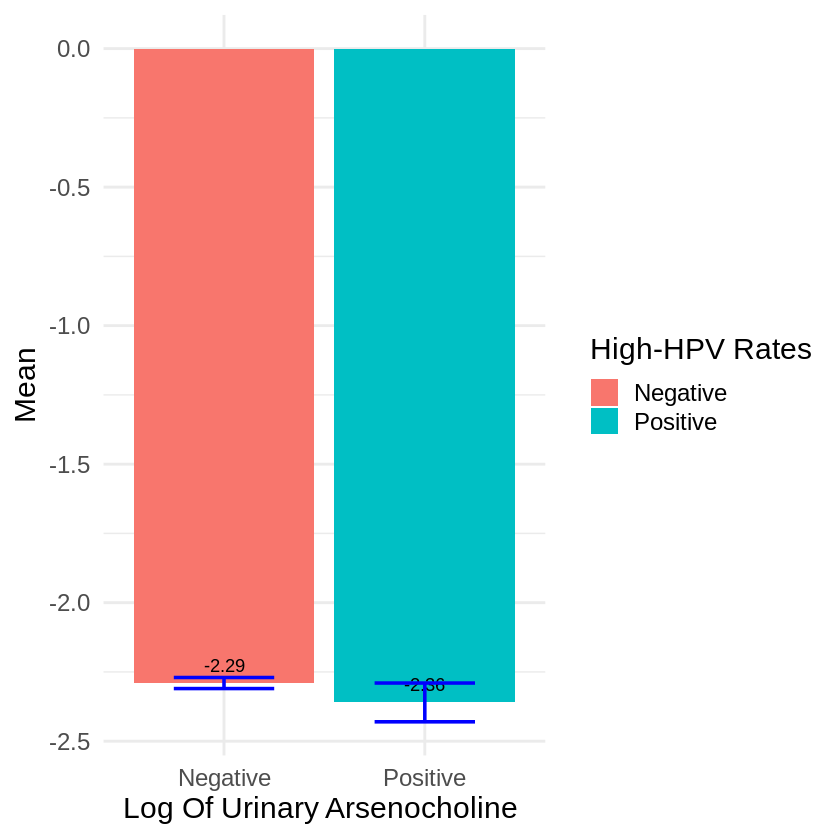

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenocholine ", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUAC, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUAC = as.numeric(HSV_df_to_use$ln.URXUAC)

t.test(ln.URXUAC ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUAC by low.HPV
t = 1.4768, df = 21.756, p-value = 0.1541
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.04309285  0.25577100
sample estimates:
mean in group Negative mean in group Positive 
             -2.291964              -2.398303 





For the t-test above, the p-value(~ 0.15 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary arsenocholine** of the negative (-2.29) low HPV and positive (-2.40) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUAC, na.rm=TRUE), Min = quantile(ln.URXUAC, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAC, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAC, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUAC, na.rm=TRUE), Min = quantile(ln.URXUAC, 0, na.rm=TRUE), Q1 = quantile(ln.URXUAC, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUAC, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUAC, 0.75, na.rm=TRUE), Max = quantile(ln.URXUAC, 1, na.rm=TRUE),
   Sd = sd(ln.URXUAC, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,-2.29,-2.525729,-2.525729,-2.525729,-2.525729,2.653242,0.5923104,0.02
Positive,22,-2.40,-2.525729,-2.525729,-2.525729,-2.525729,-1.427116,0.3347721,0.15
Total,3881,-2.29,-2.525729,-2.525729,-2.525729,-2.525729,2.653242,0.5911960,0.02



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are different.


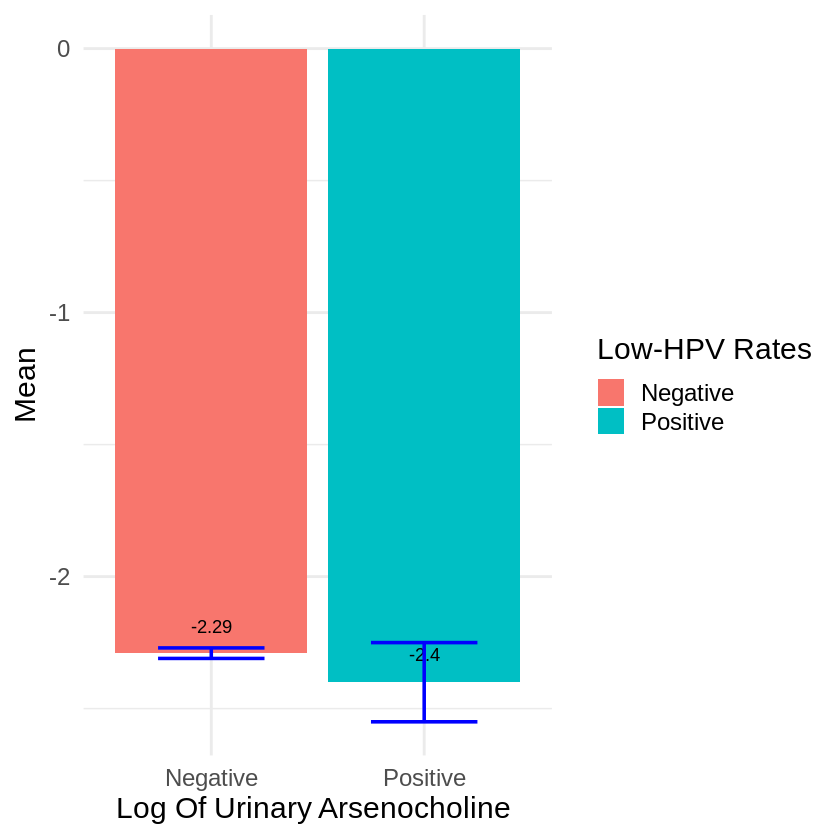

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Arsenocholine ", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)








The bar plot above shows the means of the negative and positive values for low HPV. 


## **Log Of Urinary Dimethylarsinic Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUDMA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUDMA = as.numeric(HSV_df_to_use$ln.URXUDMA)

t.test(ln.URXUDMA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUDMA by high.HPV
t = -0.20577, df = 181.98, p-value = 0.8372
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.1324643  0.1074449
sample estimates:
mean in group Negative mean in group Positive 
              1.250588               1.263098 





For the t-test above, the p-value( ~0.84 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary dimethylarsinic** of the negative (1.25) high HPV and positive (1.2) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUDMA, na.rm=TRUE), Min = quantile(ln.URXUDMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUDMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUDMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUDMA, na.rm=TRUE), Min = quantile(ln.URXUDMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUDMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUDMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,1.25,0.3001046,0.3001046,1.196948,1.754404,4.439116,0.7855376,0.03
Positive,167,1.26,0.3001046,0.6548956,1.313724,1.676158,3.891820,0.7677890,0.12
Total,3881,1.25,0.3001046,0.3001046,1.202972,1.749200,4.439116,0.7846893,0.02



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


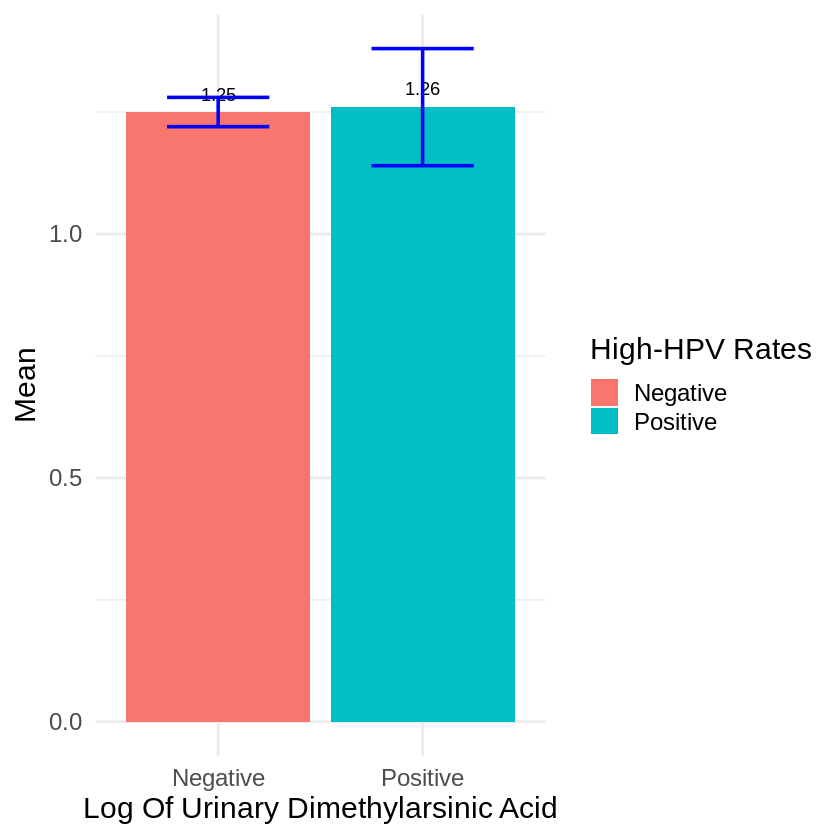

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Dimethylarsinic Acid", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUDMA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUDMA = as.numeric(HSV_df_to_use$ln.URXUDMA)

t.test(ln.URXUDMA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUDMA by low.HPV
t = 1.4878, df = 21.331, p-value = 0.1514
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.08444304  0.51047246
sample estimates:
mean in group Negative mean in group Positive 
              1.252334               1.039319 





For the t-test above, the p-value(~ 0.15 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary dimethylarsinic** of the negative (1.25) low HPV and positive (1.04) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUDMA, na.rm=TRUE), Min = quantile(ln.URXUDMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUDMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUDMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUDMA, na.rm=TRUE), Min = quantile(ln.URXUDMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUDMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUDMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUDMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUDMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUDMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,1.25,0.3001046,0.3001046,1.2059708,1.752671,4.439116,0.7852106,0.02
Positive,22,1.04,0.3001046,0.3907504,0.7997342,1.455265,2.534490,0.6689061,0.30
Total,3881,1.25,0.3001046,0.3001046,1.2029723,1.749200,4.439116,0.7846893,0.02



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


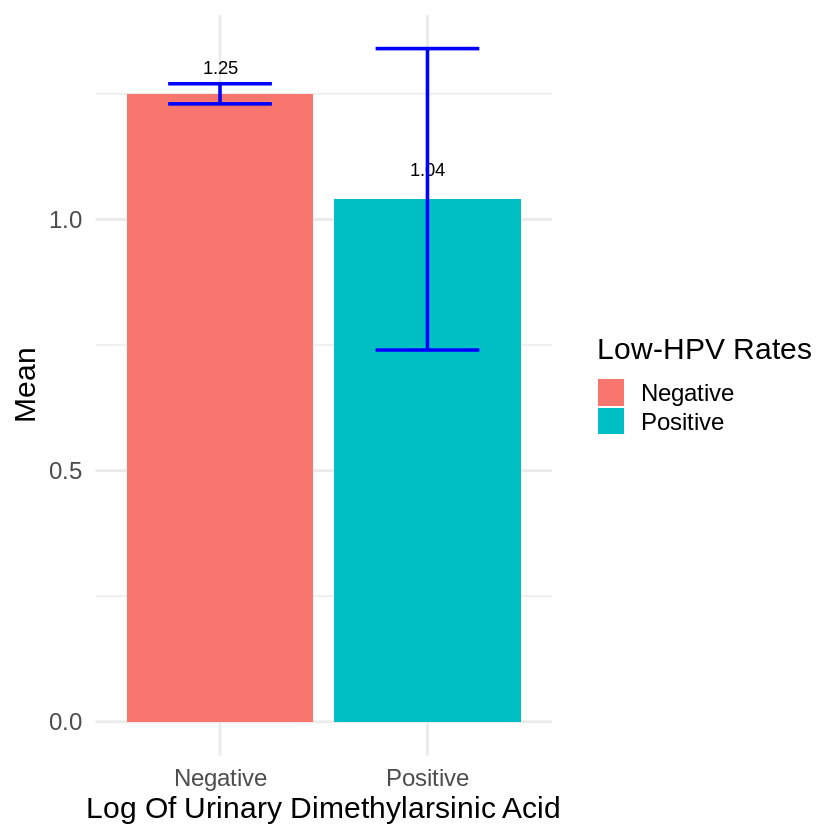

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Dimethylarsinic Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)








The bar plot above shows the means of the negative and positive values for low HPV. 




## **Log Of Urinary Monomethylarsonic Acid(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUMMA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUMMA = as.numeric(HSV_df_to_use$ln.URXUMMA)

t.test(ln.URXUMMA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUMMA by high.HPV
t = -2.4351, df = 182.14, p-value = 0.01585
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.30816368 -0.03229752
sample estimates:
mean in group Negative mean in group Positive 
            -0.8991819             -0.7289512 





For the t-test above, the p-value( ~ 0.02 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **log of urinary monomethylarsonic** of the negative (-0.89) high HPV and positive (-0.73) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.URXUMMA, na.rm=TRUE), Min = quantile(ln.URXUMMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUMMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUMMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.URXUMMA, na.rm=TRUE), Min = quantile(ln.URXUMMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUMMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUMMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,-0.90,-1.966113,-1.966113,-0.7765288,-0.18632958,2.833213,0.9076645,0.03
Positive,167,-0.73,-1.966113,-1.763380,-0.5798185,-0.03045921,1.615420,0.8826660,0.13
Total,3881,-0.89,-1.966113,-1.966113,-0.7765288,-0.17435339,2.833213,0.9071501,0.03



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


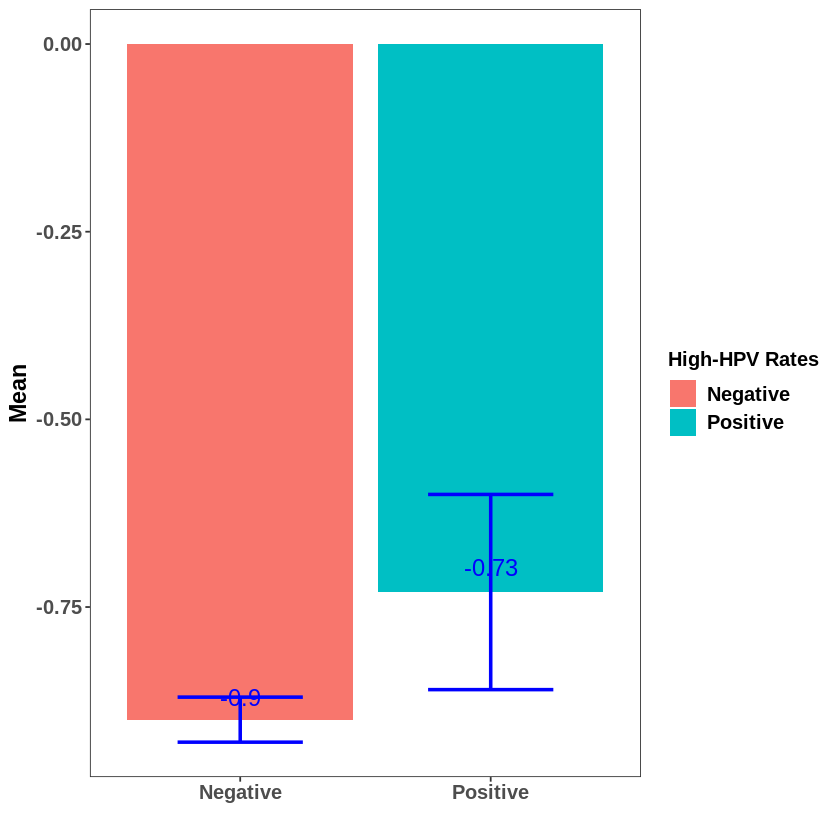

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x ="", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8, color = "blue", size = 5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size = 1)    +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.URXUMMA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.URXUMMA = as.numeric(HSV_df_to_use$ln.URXUMMA)

t.test(ln.URXUMMA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.URXUMMA by low.HPV
t = -0.33479, df = 21.255, p-value = 0.7411
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.4540408  0.3280426
sample estimates:
mean in group Negative mean in group Positive 
            -0.8922139             -0.8292148 





For the t-test above, the p-value(~ 0.74 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of urinary monomethylarsonic** of the negative (-0.89) low HPV and positive (-0.83) high HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.URXUMMA, na.rm=TRUE), Min = quantile(ln.URXUMMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUMMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUMMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.URXUMMA, na.rm=TRUE), Min = quantile(ln.URXUMMA, 0, na.rm=TRUE), Q1 = quantile(ln.URXUMMA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.URXUMMA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.URXUMMA, 0.75, na.rm=TRUE), Max = quantile(ln.URXUMMA, 1, na.rm=TRUE),
   Sd = sd(ln.URXUMMA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,-0.89,-1.966113,-1.966113,-0.7765288,-0.18632958,2.8332133,0.9074011,0.03
Positive,22,-0.83,-1.966113,-1.853117,-0.7985077,-0.06643275,0.8197798,0.8799477,0.39
Total,3881,-0.89,-1.966113,-1.966113,-0.7765288,-0.17435339,2.8332133,0.9071501,0.03



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


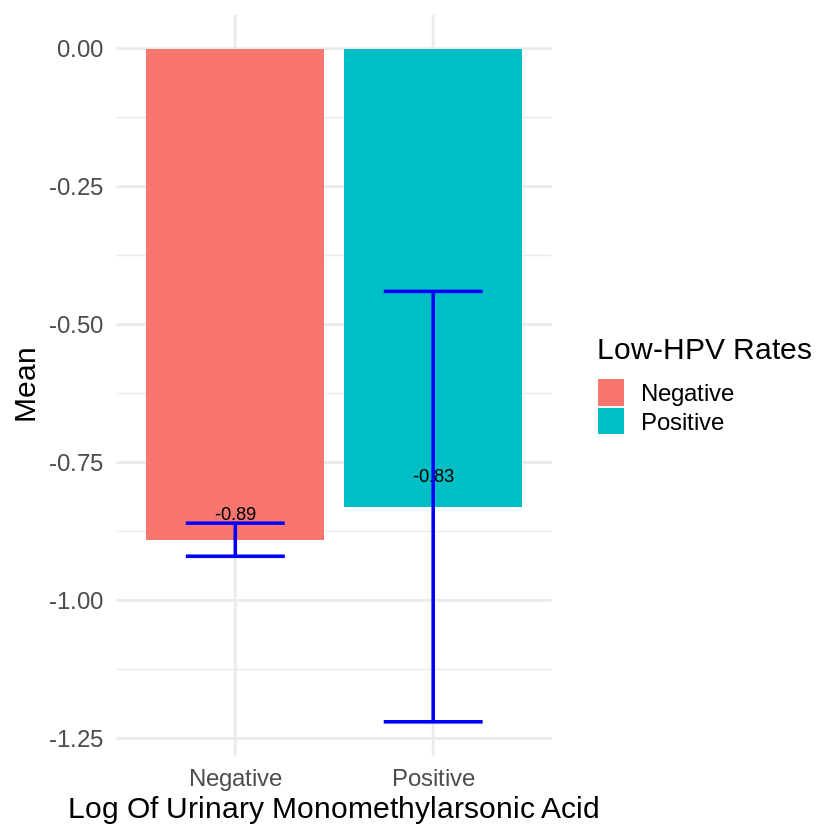

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Urinary Monomethylarsonic Acid", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)







The bar plot above shows the means of the negative and positive values for high HPV. 

## **Total Urinary Arsenic**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA = as.numeric(HSV_df_to_use$TUA)

t.test(TUA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")




	Welch Two Sample t-test

data:  TUA by high.HPV
t = 1.956, df = 200.11, p-value = 0.05186
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.02857677  7.04257709
sample estimates:
mean in group Negative mean in group Positive 
              14.88725               11.38025 





For the t-test above, the p-value( ~ 0.052 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic** of the negative (14.88) low HPV and positive (11.38) high HPV.




In [ ]:
high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
summarise(Count = n(), Mean = mean(TUA, na.rm=TRUE), Min = quantile(TUA, 0, na.rm=TRUE), Q1 = quantile(TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA, 0.5, na.rm=TRUE),  Q3 = quantile(TUA, 0.75, na.rm=TRUE), Max = quantile(TUA, 1, na.rm=TRUE),
   Sd = sd(TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(TUA, na.rm=TRUE), Min = quantile(TUA, 0, na.rm=TRUE), Q1 = quantile(TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA, 0.5, na.rm=TRUE),  Q3 = quantile(TUA, 0.75, na.rm=TRUE), Max = quantile(TUA, 1, na.rm=TRUE),
   Sd = sd(TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,14.89,0.68,3.30,6.385,12.9975,849.22,34.63817,1.11
Positive,163,11.38,1.08,3.32,6.730,11.5600,227.56,21.71076,3.36
Total,3877,14.74,0.68,3.30,6.400,12.8500,849.22,34.19858,1.08



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly similar accross the quantiles and the variance of the two groups are different.


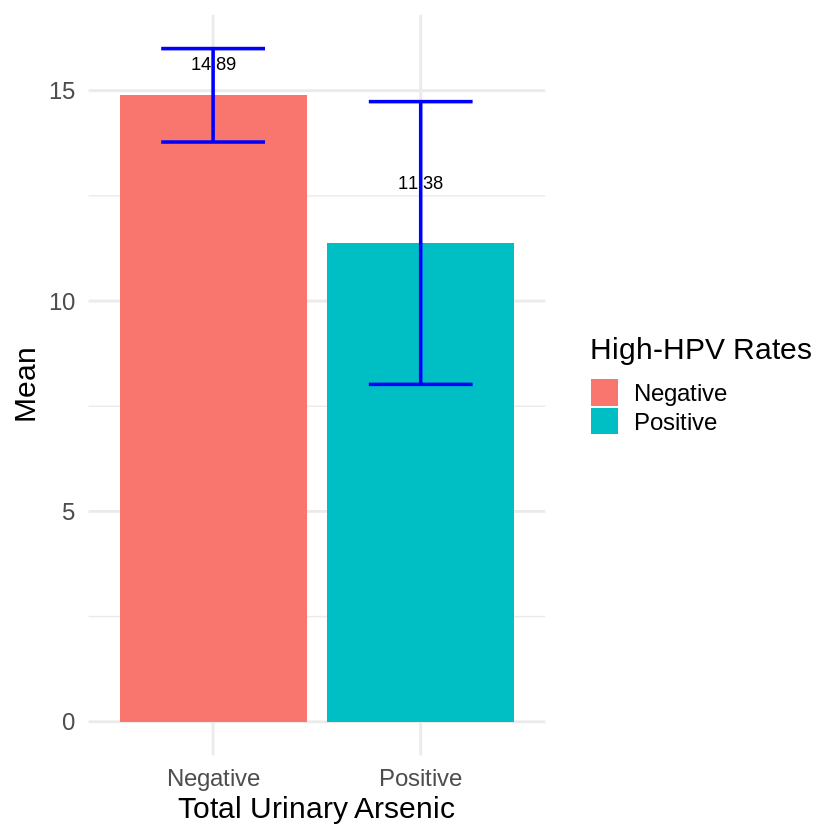

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA = as.numeric(HSV_df_to_use$TUA)

t.test(TUA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA by low.HPV
t = 4.1671, df = 26.858, p-value = 0.0002865
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
  3.431991 10.093453
sample estimates:
mean in group Negative mean in group Positive 
             14.778176               8.015455 





For the t-test above, the p-value(~ 0.0003 ) is less than alpha level (0.05). Hence there is a significant difference in the mean **total urinary arsenic** of the negative (14.88) low HPV and positive (11.38) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(TUA, na.rm=TRUE), Min = quantile(TUA, 0, na.rm=TRUE), Q1 = quantile(TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA, 0.5, na.rm=TRUE),  Q3 = quantile(TUA, 0.75, na.rm=TRUE), Max = quantile(TUA, 1, na.rm=TRUE),
   Sd = sd(TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(TUA, na.rm=TRUE), Min = quantile(TUA, 0, na.rm=TRUE), Q1 = quantile(TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA, 0.5, na.rm=TRUE),  Q3 = quantile(TUA, 0.75, na.rm=TRUE), Max = quantile(TUA, 1, na.rm=TRUE),
   Sd = sd(TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3855,14.78,0.68,3.3000,6.400,12.875,849.22,34.288198,1.08
Positive,22,8.02,1.17,3.2125,4.955,10.555,28.43,7.157785,3.17
Total,3877,14.74,0.68,3.3000,6.400,12.850,849.22,34.198583,1.08



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


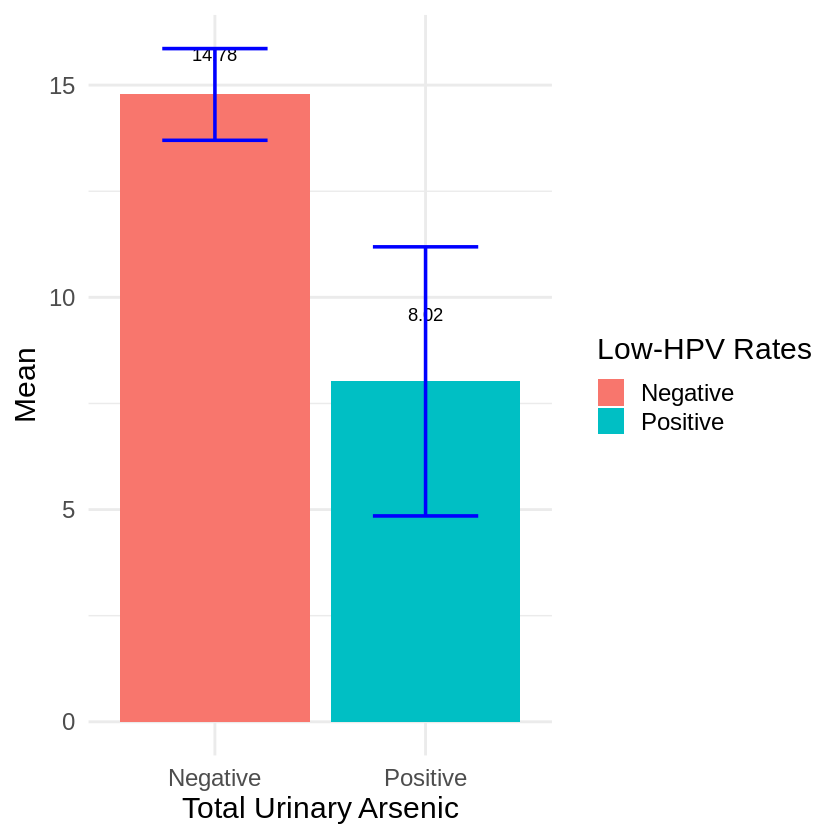

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)









The bar plot above shows the means of the negative and positive values for low HPV. 


## **Log Of Total Urinary Arsenic(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.TUA, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.TUA = as.numeric(HSV_df_to_use$ln.TUA)

t.test(ln.TUA ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.TUA by high.HPV
t = 1.0477, df = 180.93, p-value = 0.2962
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.07039701  0.22979067
sample estimates:
mean in group Negative mean in group Positive 
              1.957039               1.877342 





For the t-test above, the p-value(~ 0.30 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of total urinary arsenic** of the negative (1.96) high HPV and positive (1.87) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.TUA, na.rm=TRUE), Min = quantile(ln.TUA, 0, na.rm=TRUE), Q1 = quantile(ln.TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA, 0.75, na.rm=TRUE), Max = quantile(ln.TUA, 1, na.rm=TRUE),
   Sd = sd(ln.TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.TUA, na.rm=TRUE), Min = quantile(ln.TUA, 0, na.rm=TRUE), Q1 = quantile(ln.TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA, 0.75, na.rm=TRUE), Max = quantile(ln.TUA, 1, na.rm=TRUE),
   Sd = sd(ln.TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,1.96,-0.38566248,1.193922,1.853951,2.564757,6.744318,1.075381,0.03
Positive,163,1.88,0.07696104,1.199947,1.906575,2.447467,5.427414,0.944675,0.15
Total,3877,1.95,-0.38566248,1.193922,1.856298,2.553344,6.744318,1.070218,0.03



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


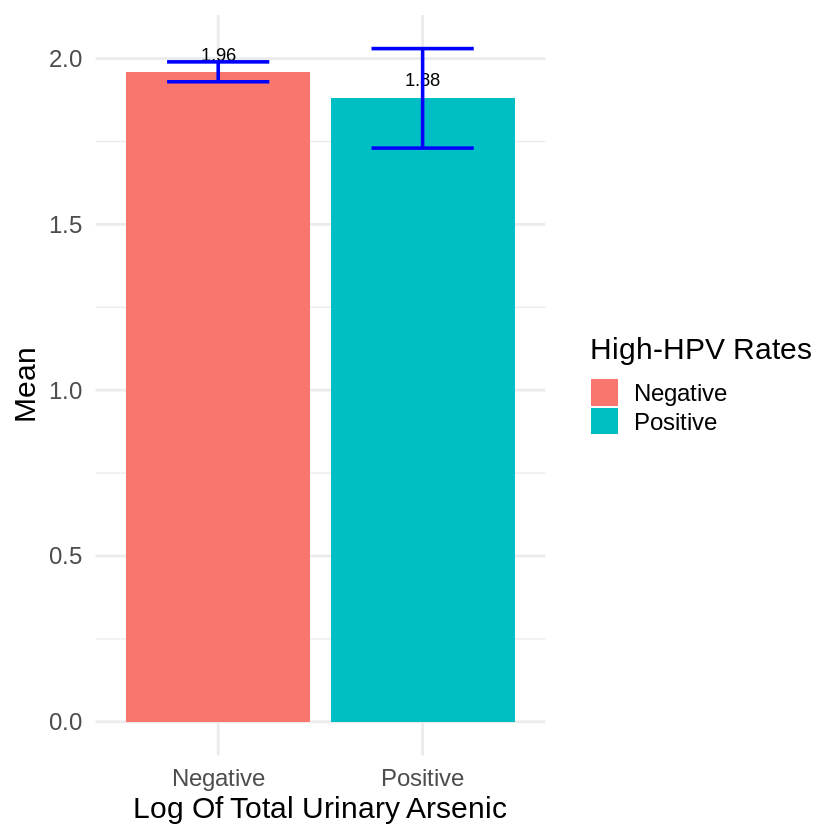

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Total Urinary Arsenic", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.TUA, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.TUA = as.numeric(HSV_df_to_use$ln.TUA)

t.test(ln.TUA ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.TUA by low.HPV
t = 1.1718, df = 21.386, p-value = 0.2542
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.1641175  0.5888344
sample estimates:
mean in group Negative mean in group Positive 
              1.954893               1.742534 





For the t-test above, the p-value(~ 0.30 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of total urinary arsenic** of the negative (1.96) low HPV and positive (1.74) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.TUA, na.rm=TRUE), Min = quantile(ln.TUA, 0, na.rm=TRUE), Q1 = quantile(ln.TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA, 0.75, na.rm=TRUE), Max = quantile(ln.TUA, 1, na.rm=TRUE),
   Sd = sd(ln.TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.TUA, na.rm=TRUE), Min = quantile(ln.TUA, 0, na.rm=TRUE), Q1 = quantile(ln.TUA, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA, 0.75, na.rm=TRUE), Max = quantile(ln.TUA, 1, na.rm=TRUE),
   Sd = sd(ln.TUA, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3855,1.95,-0.3856625,1.193922,1.856298,2.555287,6.744318,1.0713293,0.03
Positive,22,1.74,0.1570037,1.167049,1.598855,2.355959,3.347445,0.8461854,0.38
Total,3877,1.95,-0.3856625,1.193922,1.856298,2.553344,6.744318,1.0702177,0.03



From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


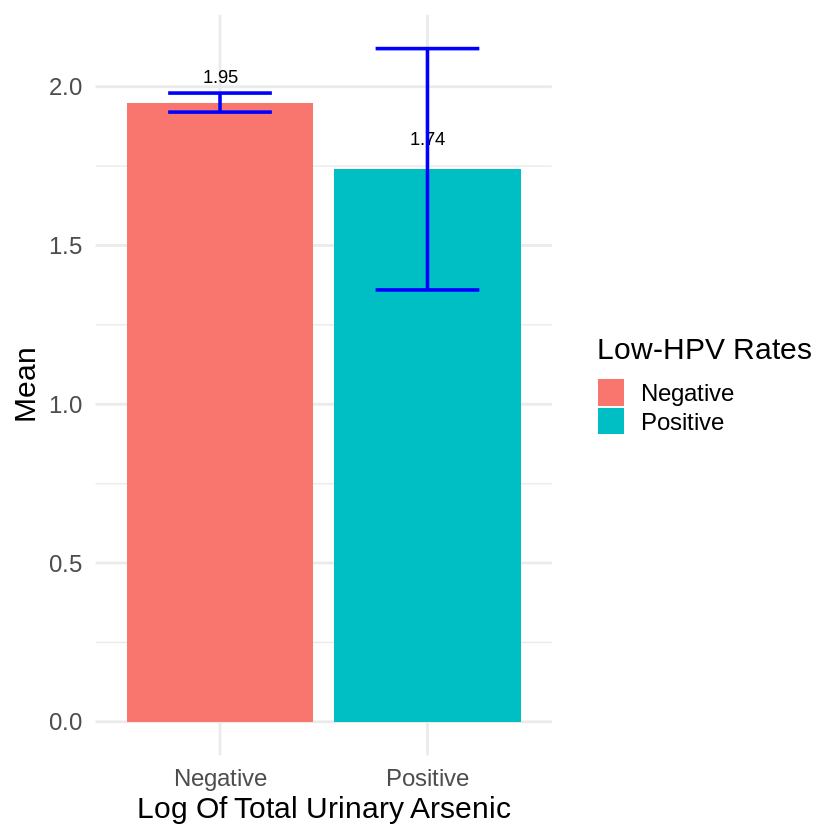

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Total Urinary Arsenic", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)










The bar plot above shows the means of the negative and positive values for low HPV. 

## **Total Urinary Arsenic 1(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA1, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA1 = as.numeric(HSV_df_to_use$TUA1)

t.test(TUA1 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA1 by high.HPV
t = -0.26419, df = 180.22, p-value = 0.7919
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.2002701  0.9168131
sample estimates:
mean in group Negative mean in group Positive 
              6.668511               6.810240 





For the t-test above, the p-value(~ 0.79 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic 1** of the negative (6.66) high HPV and positive (6.81) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(TUA1, na.rm=TRUE), Min = quantile(TUA1, 0, na.rm=TRUE), Q1 = quantile(TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(TUA1, 0.75, na.rm=TRUE), Max = quantile(TUA1, 1, na.rm=TRUE),
   Sd = sd(TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(TUA1, na.rm=TRUE), Min = quantile(TUA1, 0, na.rm=TRUE), Q1 = quantile(TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(TUA1, 0.75, na.rm=TRUE), Max = quantile(TUA1, 1, na.rm=TRUE),
   Sd = sd(TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,6.67,2.13,2.92,4.825,7.8075,116.05,6.563227,0.21
Positive,167,6.81,2.13,2.85,5.520,7.5400,51.50,6.791398,1.04
Total,3881,6.67,2.13,2.92,4.850,7.7900,116.05,6.572370,0.21



From the table above those who tested negative for high HPV are roughly 27 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


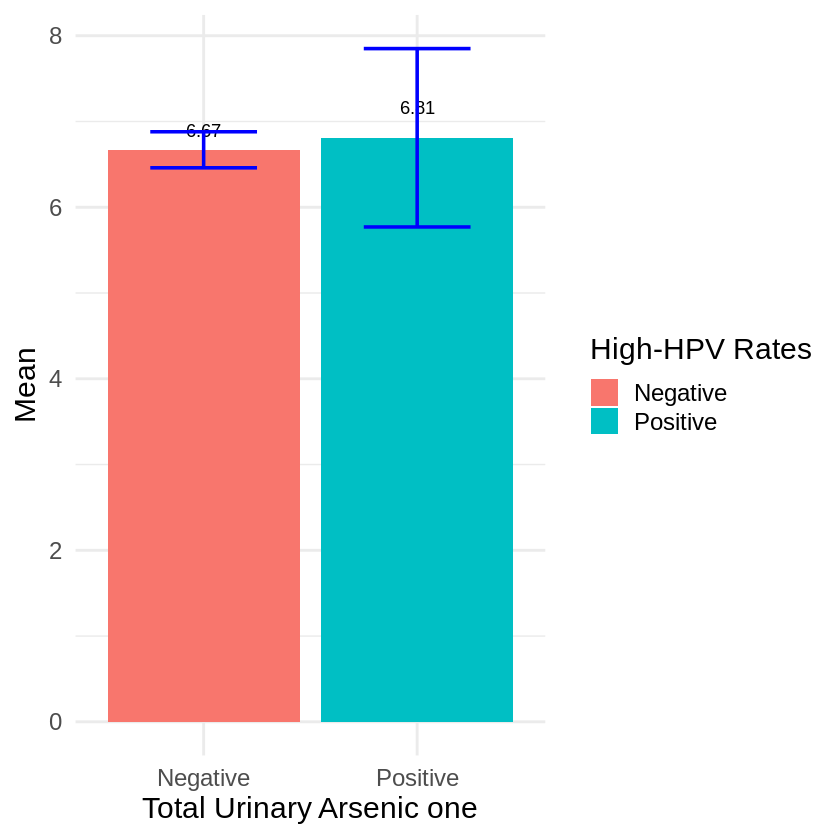

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic one", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA1, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA1 = as.numeric(HSV_df_to_use$TUA1)

t.test(TUA1 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA1 by low.HPV
t = 1.7557, df = 21.835, p-value = 0.09315
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.2433985  2.9223492
sample estimates:
mean in group Negative mean in group Positive 
              6.682203               5.342727 





For the t-test above, the p-value(~ 0.09 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic 1** of the negative (6.68) low HPV and positive (5.34) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(TUA1, na.rm=TRUE), Min = quantile(TUA1, 0, na.rm=TRUE), Q1 = quantile(TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(TUA1, 0.75, na.rm=TRUE), Max = quantile(TUA1, 1, na.rm=TRUE),
   Sd = sd(TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(TUA1, na.rm=TRUE), Min = quantile(TUA1, 0, na.rm=TRUE), Q1 = quantile(TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(TUA1, 0.75, na.rm=TRUE), Max = quantile(TUA1, 1, na.rm=TRUE),
   Sd = sd(TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,6.68,2.13,2.92,4.85,7.7950,116.05,6.585123,0.21
Positive,22,5.34,2.13,2.91,3.64,6.6975,15.10,3.543657,1.57
Total,3881,6.67,2.13,2.92,4.85,7.7900,116.05,6.572370,0.21





From the table above those who tested negative for high HPV are roughly 175 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are different.


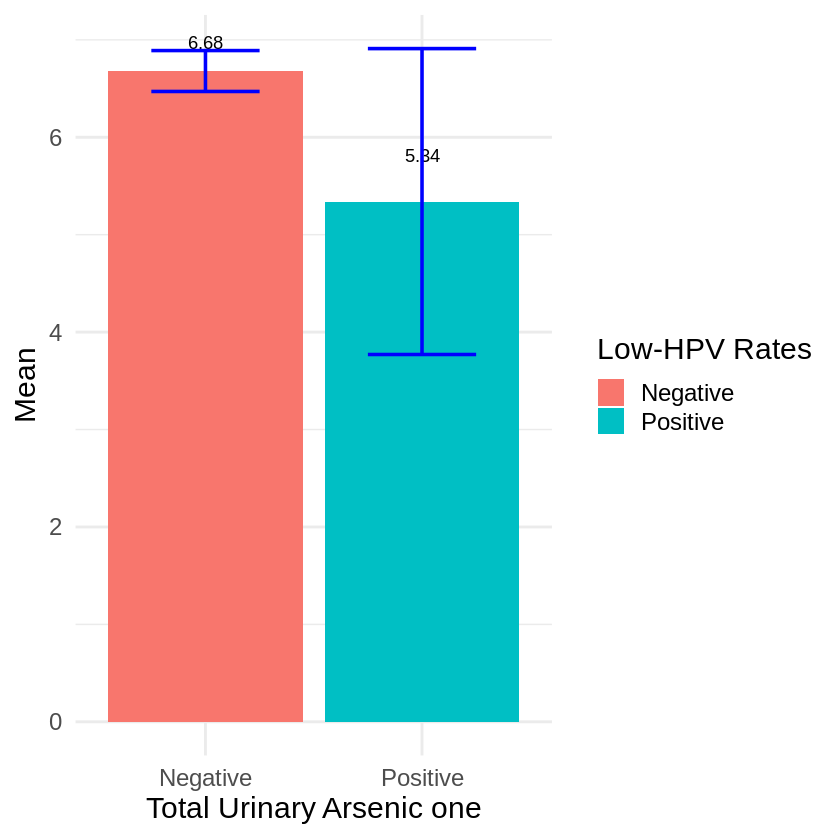

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic one", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)











The bar plot above shows the means of the negative and positive values for low HPV. 


## **Log Of Total Urinary Arsenic 1(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.TUA1, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.TUA1 = as.numeric(HSV_df_to_use$ln.TUA1)

t.test(ln.TUA1 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.TUA1 by high.HPV
t = -0.41517, df = 181.42, p-value = 0.6785
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.12775973  0.08334165
sample estimates:
mean in group Negative mean in group Positive 
              1.630144               1.652353 





For the t-test above, the p-value(~ 0.68 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of total urinary arsenic 1** of the negative (1.63) high HPV and positive (1.65) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.TUA1, na.rm=TRUE), Min = quantile(ln.TUA1, 0, na.rm=TRUE), Q1 = quantile(ln.TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA1, 0.75, na.rm=TRUE), Max = quantile(ln.TUA1, 1, na.rm=TRUE),
   Sd = sd(ln.TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.TUA1, na.rm=TRUE), Min = quantile(ln.TUA1, 0, na.rm=TRUE), Q1 = quantile(ln.TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA1, 0.75, na.rm=TRUE), Max = quantile(ln.TUA1, 1, na.rm=TRUE),
   Sd = sd(ln.TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3714,1.63,0.756122,1.071584,1.573810,2.055085,4.754021,0.6797764,0.02
Positive,167,1.65,0.756122,1.047313,1.708378,2.020221,3.941582,0.6761012,0.10
Total,3881,1.63,0.756122,1.071584,1.578979,2.052841,4.754021,0.6795469,0.02





From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


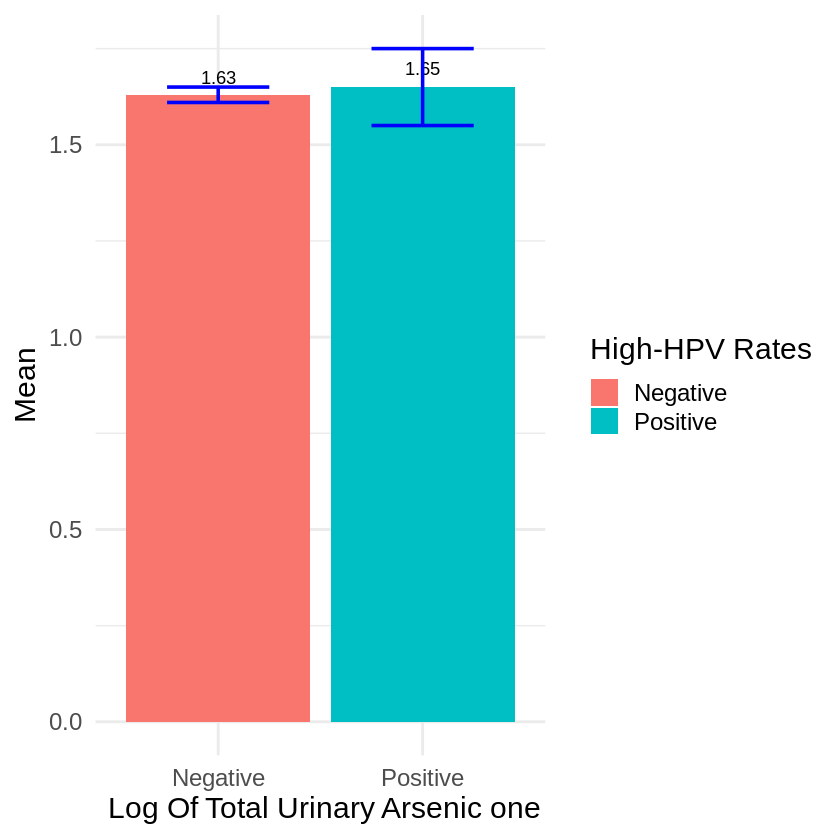

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = " Log Of Total Urinary Arsenic one", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.TUA1, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.TUA1 = as.numeric(HSV_df_to_use$ln.TUA1)

t.test(ln.TUA1 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.TUA1 by low.HPV
t = 1.0226, df = 21.35, p-value = 0.3179
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.1273688  0.3743106
sample estimates:
mean in group Negative mean in group Positive 
              1.631800               1.508329 





For the t-test above, the p-value(~ 0.32 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of total urinary arsenic 1** of the negative (1.63) low HPV and positive (1.51) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.TUA1, na.rm=TRUE), Min = quantile(ln.TUA1, 0, na.rm=TRUE), Q1 = quantile(ln.TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA1, 0.75, na.rm=TRUE), Max = quantile(ln.TUA1, 1, na.rm=TRUE),
   Sd = sd(ln.TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.TUA1, na.rm=TRUE), Min = quantile(ln.TUA1, 0, na.rm=TRUE), Q1 = quantile(ln.TUA1, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA1, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA1, 0.75, na.rm=TRUE), Max = quantile(ln.TUA1, 1, na.rm=TRUE),
   Sd = sd(ln.TUA1, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3859,1.63,0.756122,1.071584,1.578979,2.053482,4.754021,0.6801466,0.02
Positive,22,1.51,0.756122,1.068153,1.291527,1.900444,2.714695,0.5639815,0.25
Total,3881,1.63,0.756122,1.071584,1.578979,2.052841,4.754021,0.6795469,0.02



From the table above those who tested negative for low HPV are roughly 175 times those who tested positive for low HPV in number. Also, the distributions are roughly the same accross the major quantiles and the variance of the two groups are roughly similar.


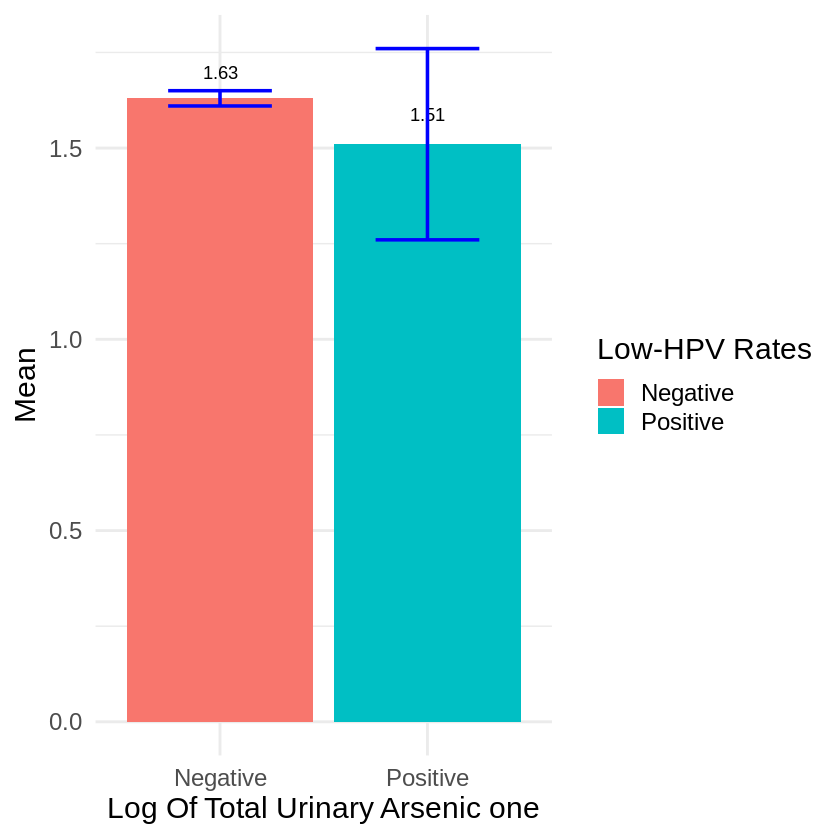

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Total Urinary Arsenic one", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)










The bar plot above shows the means of the negative and positive values for low HPV. 

## **Total Urinary Arsenic 2(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA2, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA2 = as.numeric(HSV_df_to_use$TUA2)

t.test(TUA2 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA2 by high.HPV
t = 0.47381, df = 177.18, p-value = 0.6362
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -1.152645  1.880997
sample estimates:
mean in group Negative mean in group Positive 
              6.605649               6.241472 





For the t-test above, the p-value(~ 0.64 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic 2** of the negative (6.61) high HPV and positive (6.24) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(TUA2, na.rm=TRUE), Min = quantile(TUA2, 0, na.rm=TRUE), Q1 = quantile(TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(TUA2, 0.75, na.rm=TRUE), Max = quantile(TUA2, 1, na.rm=TRUE),
   Sd = sd(TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(TUA2, na.rm=TRUE), Min = quantile(TUA2, 0, na.rm=TRUE), Q1 = quantile(TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(TUA2, 0.75, na.rm=TRUE), Max = quantile(TUA2, 1, na.rm=TRUE),
   Sd = sd(TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3693,6.61,0.00,1.940,4.18,7.73,172.50,9.779794,0.32
Positive,163,6.24,0.18,2.115,4.78,6.89,99.32,9.595532,1.48
Total,3856,6.59,0.00,1.940,4.20,7.69,172.50,9.771126,0.31



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are similar.


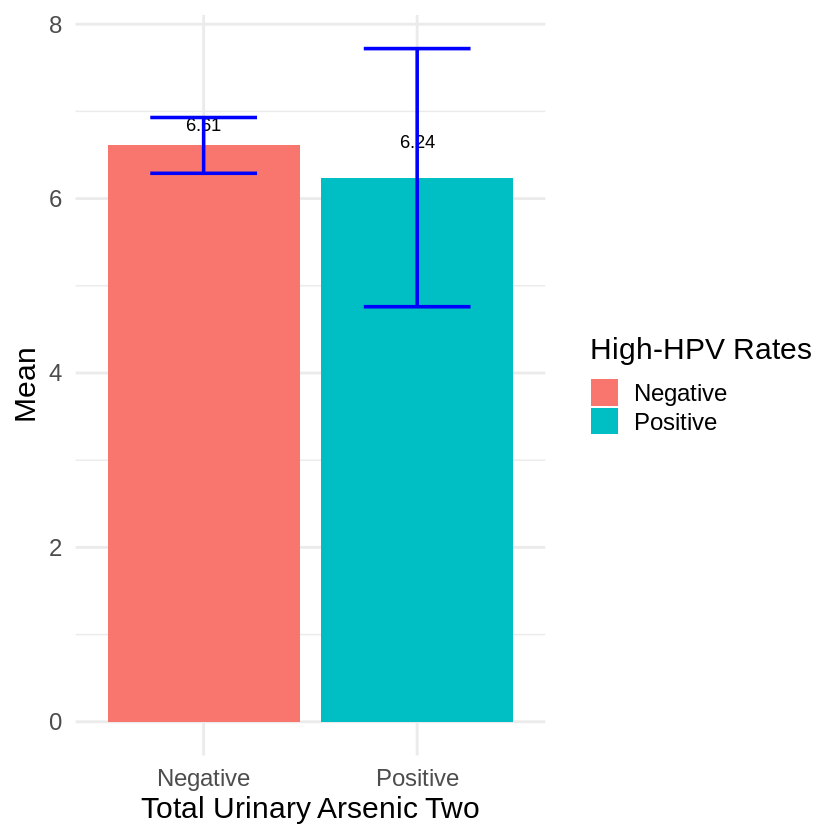

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic Two", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)


The bar plot above shows the means of the negative and positive values for high HPV. 

### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(TUA2, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$TUA2 = as.numeric(HSV_df_to_use$TUA2)

t.test(TUA2 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  TUA2 by low.HPV
t = 3.0829, df = 22.787, p-value = 0.005293
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 0.8011764 4.0744219
sample estimates:
mean in group Negative mean in group Positive 
              6.604163               4.166364 





For the t-test above, the p-value(~ 0.005 ) is less than alpha level (0.05). Hence there is no significant difference in the mean **total urinary arsenic 2** of the negative (6.60) low HPV and positive (4.16) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(TUA2, na.rm=TRUE), Min = quantile(TUA2, 0, na.rm=TRUE), Q1 = quantile(TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(TUA2, 0.75, na.rm=TRUE), Max = quantile(TUA2, 1, na.rm=TRUE),
   Sd = sd(TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(TUA2, na.rm=TRUE), Min = quantile(TUA2, 0, na.rm=TRUE), Q1 = quantile(TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(TUA2, 0.75, na.rm=TRUE), Max = quantile(TUA2, 1, na.rm=TRUE),
   Sd = sd(TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3834,6.60,0.00,1.9425,4.220,7.6975,172.50,9.793703,0.31
Positive,22,4.17,0.27,1.7200,3.005,5.2300,14.07,3.633956,1.61
Total,3856,6.59,0.00,1.9400,4.200,7.6900,172.50,9.771126,0.31



From the table above those who tested negative for high HPV are roughly 174 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


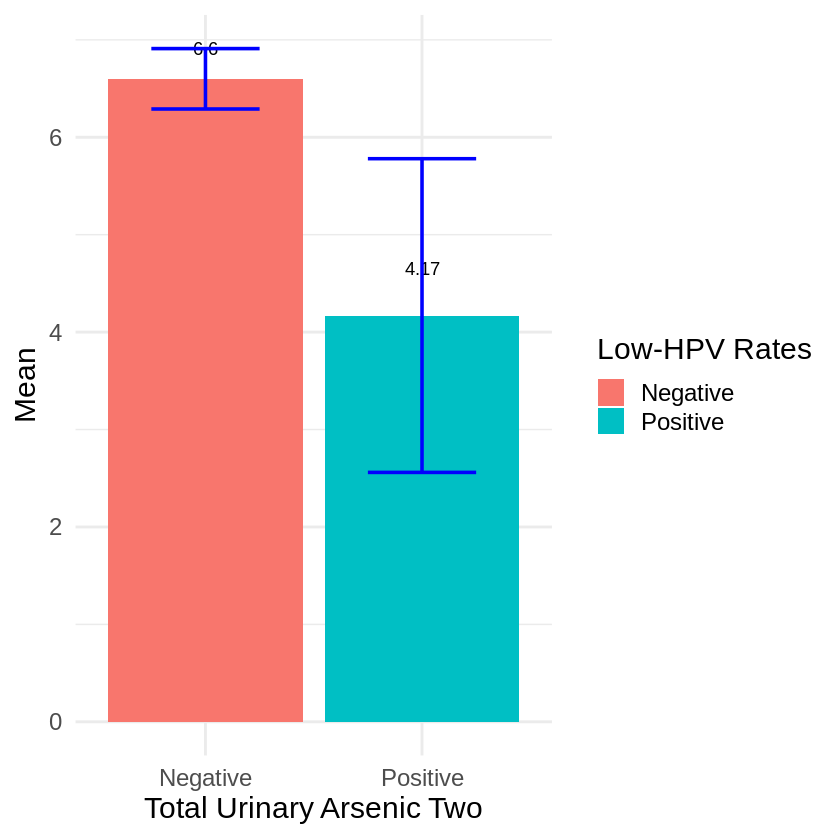

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Urinary Arsenic Two", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)










The bar plot above shows the means of the negative and positive values for low HPV. 

## **Log Of Total Urinary Arsenic 2(ug/L)**

### **High HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.TUA2, high.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.TUA2 = as.numeric(HSV_df_to_use$ln.TUA2)

t.test(ln.TUA2 ~ high.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.TUA2 by high.HPV
t = -0.58284, df = 193.32, p-value = 0.5607
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.2113416  0.1149260
sample estimates:
mean in group Negative mean in group Positive 
              1.284737               1.332945 





For the t-test above, the p-value(~ 0.56 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of total urinary arsenic 2** of the negative (1.28) high HPV and positive (1.33) high HPV.




In [ ]:

high_hpv_var = HSV_df_to_use %>% group_by(high.HPV) %>%
 summarise(Count = n(), Mean = mean(ln.TUA2, na.rm=TRUE), Min = quantile(ln.TUA2, 0, na.rm=TRUE), Q1 = quantile(ln.TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA2, 0.75, na.rm=TRUE), Max = quantile(ln.TUA2, 1, na.rm=TRUE),
   Sd = sd(ln.TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(high.HPV =  "Total", Count = n(), Mean = mean(ln.TUA2, na.rm=TRUE), Min = quantile(ln.TUA2, 0, na.rm=TRUE), Q1 = quantile(ln.TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA2, 0.75, na.rm=TRUE), Max = quantile(ln.TUA2, 1, na.rm=TRUE),
   Sd = sd(ln.TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

high_hpv_var_show = rbind(high_hpv_var, total_var)

high_hpv_var_show 
# total_var

# cat("\n\n\n")


high.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3692,1.28,-37.206804,0.662688,1.431506,2.045109,5.150397,1.463159,0.05
Positive,163,1.33,-1.714798,0.749052,1.564441,1.930071,4.598347,1.010253,0.16
Total,3855,1.29,-37.206804,0.662688,1.435085,2.039921,5.150397,1.446819,0.05



From the table above those who tested negative for high HPV are roughly 22 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are roughly similar.


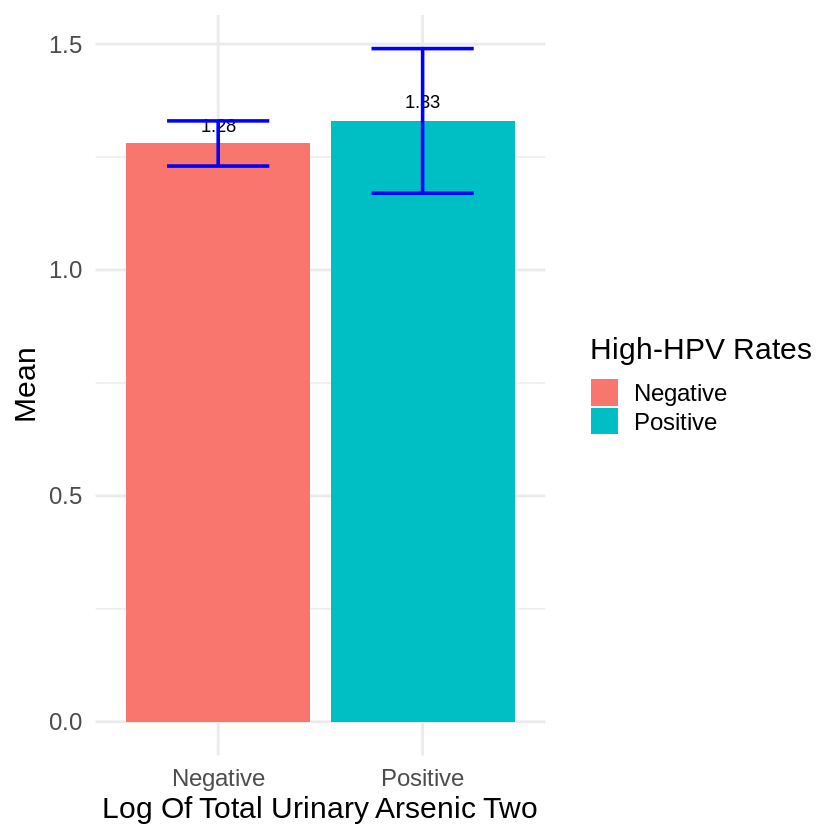

In [ ]:

ggplot(high_hpv_var, aes(x = factor(high.HPV), y = Mean , fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Total Urinary Arsenic Two", y = "Mean", fill = "High-HPV Rates") +  
      with(high_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 0.8)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)



The bar plot above shows the means of the negative and positive values for high HPV. 


### **Low HPV Section**

In [ ]:


HSV_df_to_use = HSV_df %>% select(c(ln.TUA2, low.HPV ))
HSV_df_to_use = HSV_df_to_use[complete.cases(HSV_df_to_use),]

HSV_df_to_use$ln.TUA2 = as.numeric(HSV_df_to_use$ln.TUA2)

t.test(ln.TUA2 ~ low.HPV, HSV_df_to_use)
cat("\n\n")
cat("\n\n")



	Welch Two Sample t-test

data:  ln.TUA2 by low.HPV
t = 1.1542, df = 21.564, p-value = 0.261
alternative hypothesis: true difference in means between group Negative and group Positive is not equal to 0
95 percent confidence interval:
 -0.1880942  0.6589794
sample estimates:
mean in group Negative mean in group Positive 
              1.288119               1.052677 





For the t-test above, the p-value(~ 0.26 ) is greater than alpha level (0.05). Hence there is no significant difference in the mean **log of total urinary arsenic 2** of the negative (1.28) low HPV and positive (1.05) low HPV.




In [ ]:

low_hpv_var = HSV_df_to_use %>% group_by(low.HPV)  %>%
 summarise(Count = n(), Mean = mean(ln.TUA2, na.rm=TRUE), Min = quantile(ln.TUA2, 0, na.rm=TRUE), Q1 = quantile(ln.TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA2, 0.75, na.rm=TRUE), Max = quantile(ln.TUA2, 1, na.rm=TRUE),
   Sd = sd(ln.TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )
total_var = HSV_df_to_use %>%
 summarise(low.HPV =  "Total", Count = n(), Mean = mean(ln.TUA2, na.rm=TRUE), Min = quantile(ln.TUA2, 0, na.rm=TRUE), Q1 = quantile(ln.TUA2, 0.25, na.rm=TRUE), 
  Q2 = quantile(ln.TUA2, 0.5, na.rm=TRUE),  Q3 = quantile(ln.TUA2, 0.75, na.rm=TRUE), Max = quantile(ln.TUA2, 1, na.rm=TRUE),
   Sd = sd(ln.TUA2, na.rm=TRUE), .groups = 'drop') %>%
   mutate( Margin_Error = {Sd/sqrt(Count)} * qt(1-0.05/2, Count - 1)  ) %>% mutate(Mean = round(Mean, 2),  Margin_Error = round(Margin_Error, 2) )

low_hpv_var_show = rbind(low_hpv_var, total_var)

low_hpv_var_show 
cat("\n\n\n")


low.HPV,Count,Mean,Min,Q1,Q2,Q3,Max,Sd,Margin_Error
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,3833,1.29,-37.206804,0.6678294,1.439835,2.041220,5.150397,1.4491499,0.05
Positive,22,1.05,-1.309333,0.5423243,1.098946,1.654138,2.644045,0.9504579,0.42
Total,3855,1.29,-37.206804,0.6626880,1.435085,2.039921,5.150397,1.4468188,0.05



From the table above those who tested negative for high HPV are roughly 174 times those who tested positive for high HPV in number. Also, the distributions are different accross the quantiles and the variance of the two groups are different.


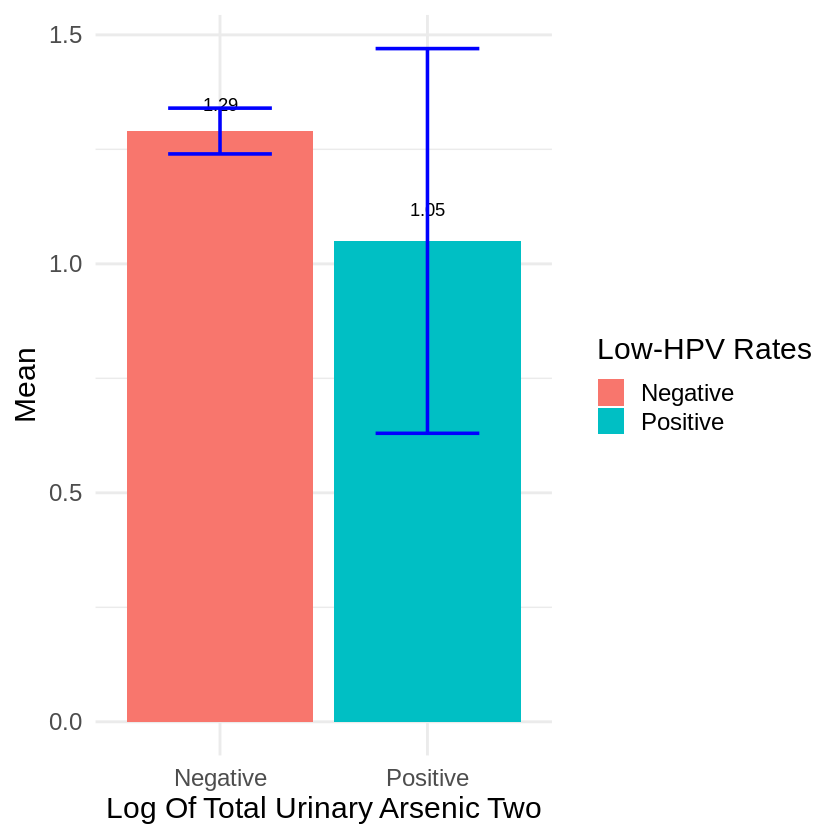

In [ ]:

ggplot(low_hpv_var, aes(x = factor(low.HPV), y = Mean , fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Log Of Total Urinary Arsenic Two", y = "Mean", fill = "Low-HPV Rates") +  
      with(low_hpv_var, geom_text(aes(label = Mean), position=position_dodge(width=0.5), vjust = - Margin_Error - 1.5)) +
      geom_errorbar(aes(ymin = Mean  - Margin_Error, ymax = Mean + Margin_Error), width = 0.5, position = position_dodge(width = 0.5), color="blue", size=1)    +
  theme_minimal(base_size = 18)











The bar plot above shows the means of the negative and positive values for low HPV. 
